# **Wide Formats** (When you are interested in all feature of a particular record)

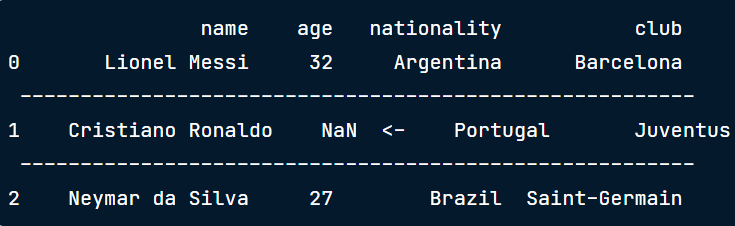

* Each feature is in a seperate column
* Each row contains many features of the same record
* No duplicate, but there can be missing values
* Better for performing stats and imputations

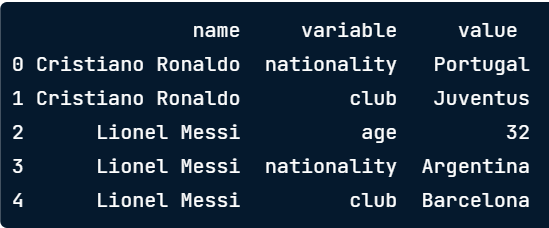

# **Long Formats** (when you are interested in each feature of a particular record)

* Each row represents one feature
* Multiple rows for the same record
* Preferred for analysis and graphing

## **Flipping players**


Explore your dataset and reshape it using basic steps, such as 
* setting different indices
* filtering columns
* flipping the DataFrame 

1. Set the index of `fifa_players` to be the `name` column and assign it to `fifa_transpose`.
2. Select only the columns height and weight from the `fifa_players` DataFrame.
3. Finally, transpose the `fifa_players` DataFrame so that the rows become columns and the columns become rows.

In [19]:
import pandas as pd

fifa_players = pd.read_csv("players_20.csv")[["long_name",	"age",	"height_cm",	"weight_kg", 	"nationality",	"club"]].head()
fifa_players.columns = ["name",  "age",  "height",  "weight", "nationality", "club"]
display(fifa_players)
print("\n\n")

# Set name as index
fifa_transpose = fifa_players.set_index("name")
display(fifa_transpose)
print("\n\n")

# Modify the DataFrame to keep only height and weight columns
fifa_transpose = fifa_players.set_index('name')[["height", "weight"]]
display(fifa_transpose)
print("\n\n")

# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('name')[['height', 'weight']].transpose()
display(fifa_transpose)

,name,age,height,weight,nationality,club
0,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona
1,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus
2,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain
3,Jan Oblak,26,188,87,Slovenia,Atlético Madrid
4,Eden Hazard,28,175,74,Belgium,Real Madrid


,age,height,weight,nationality,club
name,,,,,
Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona
Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus
Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain
Jan Oblak,26,188,87,Slovenia,Atlético Madrid
Eden Hazard,28,175,74,Belgium,Real Madrid


,height,weight
name,,
Lionel Andrés Messi Cuccittini,170,72
Cristiano Ronaldo dos Santos Aveiro,187,83
Neymar da Silva Santos Junior,175,68
Jan Oblak,188,87
Eden Hazard,175,74


name,Lionel Andrés Messi Cuccittini,Cristiano Ronaldo dos Santos Aveiro,Neymar da Silva Santos Junior,Jan Oblak,Eden Hazard
height,170,187,175,188,175
weight,72,83,68,87,74


# **PIVOT**

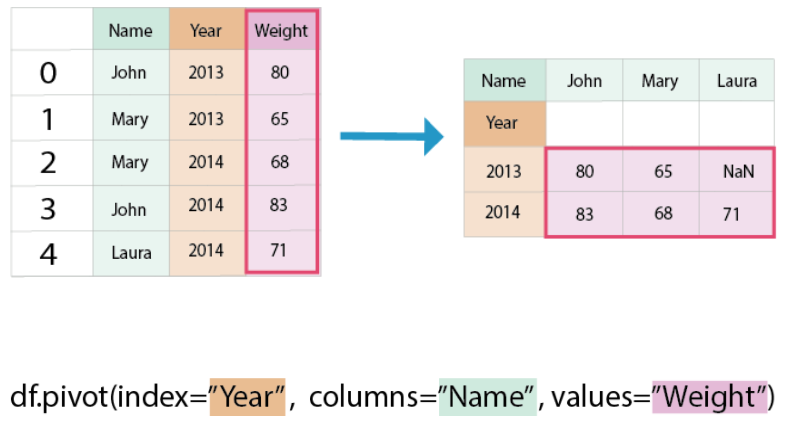

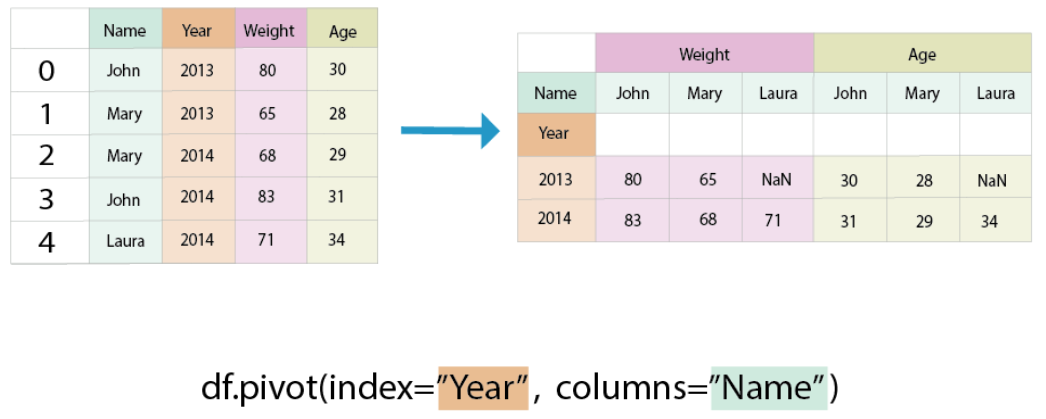

# **Duplication Errors**

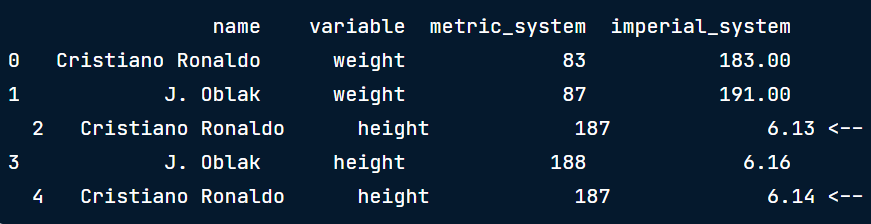

## **Dribbling the pivot method**


* Pivot `fifa_players` to get a DataFrame with `overall` scores indexed by `name`, and identified by `movement` in the columns.

* Pivot `fifa_players` to get a DataFrame with `attacking` scores indexed by `name`, and identified by `movement` in the columns.

* Use `.pivot()` on `fifa_players` to get `overall` scores indexed by `movement`, and identified by `name` in the columns.

In [74]:
import pandas as pd

fifa_players = pd.read_csv("players_20.csv")[["short_name",	"shooting",	"passing",	"dribbling", 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']].head(2)
fifa_players.rename(columns={"short_name": "name"}, inplace=True)
f1 = fifa_players.melt(id_vars="name", value_vars=["shooting",	"passing",	"dribbling"], var_name="movement", value_name="overall")
f2 = fifa_players.melt(id_vars="name", value_vars=["attacking_heading_accuracy",	"attacking_short_passing",	"attacking_volleys"], var_name="movement", value_name="attacking").drop("movement", axis=1)
fifa_players = f1.merge(f2, left_index=True, right_index=True).drop("name_y", axis=1).rename(columns={"name_x": "name"})
display(fifa_players)
print("\n\n")

# Pivot fifa_players to get overall scores indexed by name and identified by movement
fifa_overall = fifa_players.pivot(index="name", columns="movement", values="overall")

# Print fifa_overall
display(fifa_overall)
print("\n\n")

# Pivot fifa_players to get attacking scores indexed by name and identified by movement
fifa_attacking = fifa_players.pivot(index="name", columns="movement", values="attacking")

# Print fifa_attacking
display(fifa_attacking)
print("\n\n")

# Use the pivot method to get overall scores indexed by movement and identified by name
fifa_names = fifa_players.pivot(index="movement", columns="name", values="overall")

# Print fifa_names
display(fifa_names)


,name,movement,overall,attacking
0,L. Messi,shooting,92.0,70
1,Cristiano Ronaldo,shooting,93.0,89
2,L. Messi,passing,92.0,92
3,Cristiano Ronaldo,passing,82.0,83
4,L. Messi,dribbling,96.0,88
5,Cristiano Ronaldo,dribbling,89.0,87


movement,dribbling,passing,shooting
name,,,
Cristiano Ronaldo,89.0,82.0,93.0
L. Messi,96.0,92.0,92.0


movement,dribbling,passing,shooting
name,,,
Cristiano Ronaldo,87,83,89
L. Messi,88,92,70


name,Cristiano Ronaldo,L. Messi
movement,,
dribbling,89.0,96.0
passing,82.0,92.0
shooting,93.0,92.0


# **Offensive or defensive player?**

* Pivot `fifa_players` to get `overall` and `attacking` scores indexed by `name`, and identified by `movement` in the columns.

* Use the `.pivot()` method on `fifa_players` to get all the scores indexed by `name`,and identified by `movement` in the columns.

In [77]:
# Pivot fifa_players to get overall and attacking scores indexed by name and identified by movement
fifa_over_attack = fifa_players.pivot(index="name", 
                                      columns="movement", 
                                      values=["overall", "attacking"])

# Print fifa_over_attack
display(fifa_over_attack)
print("\n\n")

# Use pivot method to get all the scores index by name and identified by movement
fifa_all = fifa_players.pivot(index="name", columns="movement")

# Print fifa_over_attack
display(fifa_all)
print("\n\n")

fifa_over_attack.equals(fifa_all)

overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo      89.0    82.0     93.0      87.0    83.0     89.0
L. Messi               96.0    92.0     92.0      88.0    92.0     70.0

overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo      89.0    82.0     93.0        87      83       89
L. Messi               96.0    92.0     92.0        88      92       70

False

## **Replay that last move!  (Duplication Errors)**

You suspect that there are different scores for the same index and column values. You remember that using the .pivot() method for all the columns does not work in that case.

First, you decide to delete the problematic row so you can reshape the DataFrame afterwards.

In [89]:
import pandas as pd

fifa_players = pd.read_csv("players_20.csv")[["short_name",	"shooting",	"passing",	"dribbling", 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']].head(2)
fifa_players.rename(columns={"short_name": "name"}, inplace=True)
f1 = fifa_players.melt(id_vars="name", value_vars=["shooting",	"passing",	"dribbling"], var_name="movement", value_name="overall")
f2 = fifa_players.melt(id_vars="name", value_vars=["attacking_heading_accuracy",	"attacking_short_passing",	"attacking_volleys"], var_name="movement", value_name="attacking").drop("movement", axis=1)
fifa_players = f1.merge(f2, left_index=True, right_index=True).drop("name_y", axis=1).rename(columns={"name_x": "name"})
fifa_players = fifa_players.append({"name": "L. Messi", "movement":"dribbling", "overall":88,  "attacking": 97}, ignore_index=True)
fifa_players["overall"] = fifa_players["overall"].astype(int)
display(fifa_players)
print("\n\n")

# This should produce dupication errors
fifa_players.pivot(index="name", columns="movement")



,name,movement,overall,attacking
0,L. Messi,shooting,92,70
1,Cristiano Ronaldo,shooting,93,89
2,L. Messi,passing,92,92
3,Cristiano Ronaldo,passing,82,83
4,L. Messi,dribbling,96,88
5,Cristiano Ronaldo,dribbling,89,87
6,L. Messi,dribbling,88,97


ValueError: ignored

* Drop the fifth row of the `fifa_players` DataFrame.
* Pivot `fifa_players` to get all the scores indexed by `name`, and identified by `movement` in the columns.

### When the `.pivot()` method finds <ins>two (or more) rows with the same index and column, but ***different values***</ins> for the values, it doesn't know how to handle it.

In [91]:
# Drop the fifth row to delete all repeated rows
fifa_no_rep = fifa_players.drop(4, axis=0)

# Pivot fifa players to get all scores by name and movement
fifa_pivot = fifa_no_rep.pivot(index="name", columns="movement") 

# Print fifa_pivot
display(fifa_pivot)  

overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        89      82       93        87      83       89
L. Messi                 88      92       92        97      92       70

# **Pivot Table**

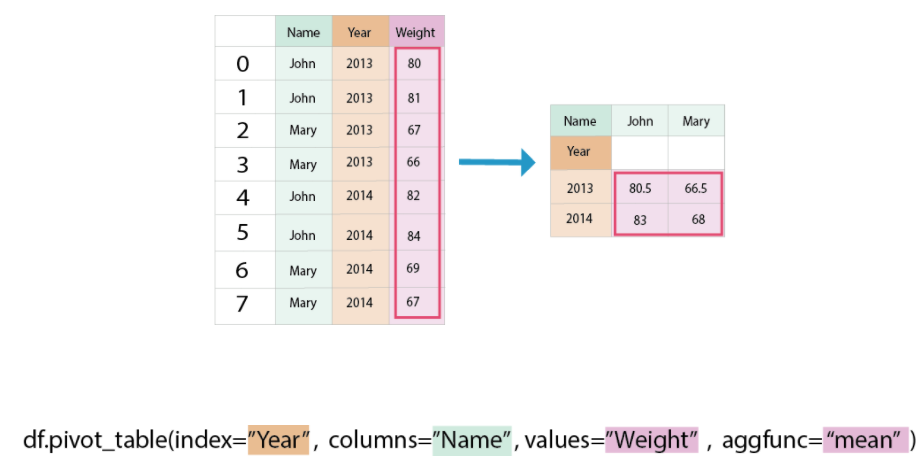

# **Reviewing the moves**

Above was a DataFrame that had non-unique index/column pairs. In order to pivot your DataFrame, you wrote code to drop the last row, and then reshaped it.

* Discard the fifth row of the `fifa_players` DataFrame.
* Use `.pivot()` on `fifa_players` to get all the scores indexed by `name`, and identified by `movement` in the columns.
* Use a pivot table to show the mean of all scores by `name` and movement, setting `name` as index.

In [95]:
display(fifa_players)
print("\n\n")

# Discard the fifth row to delete all repeated rows
fifa_drop = fifa_players.drop(4, axis=0)

# Use pivot method to get all scores by name and movement
fifa_pivot = fifa_drop.pivot(index="name", columns="movement") 

# Print fifa_pivot
display(fifa_pivot)  
print("\n\n")

# Use pivot table to get all scores by name and movement
fifa_pivot_table = fifa_players.pivot_table(index="name", 
                                     columns="movement", 
                                     aggfunc="mean")
# Print fifa_pivot_table
display(fifa_pivot_table)

,name,movement,overall,attacking
0,L. Messi,shooting,92,70
1,Cristiano Ronaldo,shooting,93,89
2,L. Messi,passing,92,92
3,Cristiano Ronaldo,passing,82,83
4,L. Messi,dribbling,96,88
5,Cristiano Ronaldo,dribbling,89,87
6,L. Messi,dribbling,88,97


overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        89      82       93        87      83       89
L. Messi                 88      92       92        97      92       70

attacking                    overall                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo      87.0    83.0     89.0        89      82       93
L. Messi               92.5    92.0     70.0        92      92       92

## ให้สังเกตว่า ถ้าใช้ `.pivot_table` กับข้อมูลที่ไม่มีค่าซ้ำ ก็จะได้ผลเหมือนกับ `.pivot` เพราะค่า mean ในกรณีที่ตัวอย่างไม่มีค่าซ้ำ ก็จะมีค่าเดียว คือ ตัวมันเอง

In [96]:
fifa_drop.pivot_table(index="name", columns="movement")

attacking                    overall                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        87      83       89        89      82       93
L. Messi                 97      92       70        88      92       92

## **Exploring the big match**

Examine the characteristics of players belonging to different teams.

Particularly, you are interested in players from two big rival teams: Barcelona and Real Madrid.

You decide that `.pivot_table()` is the best tool to get your results since it's an easy way to generate a report. Also, it allows you to define aggregation functions and work with multiple indices.


* Use a pivot table to show the mean age of players in `fifa_players` by `club` and `nationality`. Set `nationality` as the index.

* Use a pivot table to show the maximum height of any player by `club` and `nationality`, setting `nationality` as the index.

* Define the DataFrame `players_country` that shows the player count by `club` and `nationality` and get the total count.

In [117]:
import pandas as pd

fifa_players = pd.read_csv("players_20.csv")
fifa_players = fifa_players[fifa_players["sofifa_id"].isin([192448, 177003, 176580, 194765, 182521, 200145, 165153, 205600,
       168651, 201535, 220440, 194404, 176676, 231443, 230658, 240130,
       201400, 228618, 238794, 239053, 243812, 209749, 245388])][["sofifa_id", "long_name", "age",  "height_cm",  "weight_kg", "nationality", "club"]]
fifa_players = fifa_players.rename(columns={"long_name":"name", "height_cm": "height",  "weight_kg": "weight"})   
fifa_players.reset_index(drop=True, inplace=True)    
display(fifa_players)
print("\n\n")

# Use pivot table to display mean age of players by club and nationality 
mean_age_fifa = fifa_players.pivot_table(index="nationality", columns="club", values="age", aggfunc="mean")
display(mean_age_fifa)
print("\n\n")

# Use pivot table to display max height of any player by club and nationality
tall_players_fifa = fifa_players.pivot_table(index="nationality", columns="club", values="height", aggfunc="max")
display(tall_players_fifa)
print("\n\n")

# Use pivot table to show the count of players by club and nationality and the total count
players_country = fifa_players.pivot_table(index="nationality", columns="club", values="name", aggfunc="count", margins=True)

# Print players_country
display(players_country)

,sofifa_id,name,age,height,weight,nationality,club
0,192448,Marc-André ter Stegen,27,187,85,Germany,FC Barcelona
1,177003,Luka Modrić,33,172,66,Croatia,Real Madrid
2,176580,Luis Alberto Suárez Díaz,32,182,86,Uruguay,FC Barcelona
3,194765,Antoine Griezmann,28,176,73,France,FC Barcelona
4,182521,Toni Kroos,29,183,76,Germany,Real Madrid
5,200145,Carlos Henrique Venancio Casimiro,27,185,84,Brazil,Real Madrid
6,165153,Karim Benzema,31,185,81,France,Real Madrid
7,205600,Samuel Umtiti,25,182,75,France,FC Barcelona
8,168651,Ivan Rakitić,31,184,78,Croatia,FC Barcelona
9,201535,Raphaël Varane,26,191,81,France,Real Madrid


club,FC Barcelona,Real Madrid
nationality,,
Brazil,25.666667,23.5
Croatia,31.000000,33.0
France,23.600000,27.0
Germany,27.000000,29.0
Uruguay,32.000000,20.0


club,FC Barcelona,Real Madrid
nationality,,
Brazil,190,186
Croatia,184,172
France,190,191
Germany,187,183
Uruguay,182,182


club,FC Barcelona,Real Madrid,All
nationality,,,
Brazil,3,6,9
Croatia,1,1,2
France,5,3,8
Germany,1,1,2
Uruguay,1,1,2
All,11,12,23


# **The tallest and the heaviest**
You will continue your exploration of characteristics of players in fifa_players belonging to two teams: FC Barcelona and Real Madrid. As your last task, you are interested in exploring the maximum height and weight separated by teams and nationality. You will also compare two years, 2000 and 2010.

You have two columns that you want to set as an index, so you will need to use `pivot_table()`.

* Use a pivot table to get all the values in the year column of the `fifa_players` DataFrame, setting `nationality` and `club` as index.
* Pass the appropriate function to `.pivot_table()` to show the maximum values of the year columns.
* Set the appropriate argument in  `.pivot_table() ` to get the maximum for each row and column.

In [127]:
import pandas as pd

fifa_players = pd.read_csv("fifa_01.csv", index_col=[0])
fifa_players.columns = ["club", "nationality",	"year",	"height",	"weight"]
display(fifa_players)
print("\n\n")

# Define a pivot table to get the characteristic by nationality and club
fifa_mean = fifa_players.pivot_table(index=["nationality", "club"], columns="year")
# fifa_players.pivot(index=["nationality", "club"], columns="year") ก็ใช้ได้เพราะไม่มีค่าซ้ำ
display(fifa_mean)
print("\n\n")

# Set the appropriate argument to show the maximum values
fifa_mean = fifa_players.pivot_table(index=['nationality', 'club'], columns='year', aggfunc="max")
display(fifa_mean)
print("\n\n")

# Set the argument to get the maximum for each row and column
fifa_mean = fifa_players.pivot_table(index=['nationality', 'club'], columns='year', aggfunc='max', margins=True)
display(fifa_mean)


,club,nationality,year,height,weight
0,FC Barcelona,Germany,2000,187,85
1,FC Barcelona,Germany,2010,189,87
2,Real Madrid,Croatia,2000,172,66
3,Real Madrid,Croatia,2010,173,68
4,Real Madrid,Germany,2000,183,76
5,Real Madrid,Germany,2010,185,77
6,FC Barcelona,Croatia,2000,184,78
7,FC Barcelona,Croatia,2010,185,76


height      weight     
year                       2000 2010   2000 2010
nationality club                                
Croatia     FC Barcelona    184  185     78   76
            Real Madrid     172  173     66   68
Germany     FC Barcelona    187  189     85   87
            Real Madrid     183  185     76   77

height      weight     
year                       2000 2010   2000 2010
nationality club                                
Croatia     FC Barcelona    184  185     78   76
            Real Madrid     172  173     66   68
Germany     FC Barcelona    187  189     85   87
            Real Madrid     183  185     76   77

height           weight         
year                       2000 2010  All   2000 2010 All
nationality club                                         
Croatia     FC Barcelona    184  185  185     78   76  78
            Real Madrid     172  173  173     66   68  68
Germany     FC Barcelona    187  189  189     85   87  87
            Real Madrid     183  185  185     76   77  77
All                         187  189  189     85   87  87

## **Gothic times**

The dataset `books_gothic` is in a wide format. Any analysis will require you to reshape the data into a long format. To that aim, you will melt your dataset. You will reshape the dataset using several variables as identifiers to decide which is the best format.

* Define a `gothic_melted` DataFrame by melting the `books_gothic` DataFrame, using only the `title` as an identifier variable.

* Melt the `books_gothic` DataFrame, now using the `title`, `authors`, and `publisher` columns as identifier variables.

In [19]:
import pandas as pd

books_gothic = pd.DataFrame({"title":['Wuthering Heights', 'Frankenstein', 'The Picture of Dorian Gray'], "authors":['Emily Bronte', 'Mary Shelley', 'Oscar Wilde'], "num_pages": [322, 189, 187], "rating_count": [2155, 2452, 3342], "rating": [3.85, 4.31, 4.15], "publisher":['Penguin Books', 'Kaplan Publishing', 'Pearson']})
display(books_gothic)
print("\n\n")

# Melt books_gothic using the title column as identifier 
gothic_melted = books_gothic.melt(id_vars="title")
display(gothic_melted)
print("\n\n")

# Melt books_gothic using the title, authors, and publisher columns as identifier
gothic_melted_new = books_gothic.melt(id_vars=["title", "authors", "publisher"])

# Print gothic_melted_new
display(gothic_melted_new)

,title,authors,num_pages,rating_count,rating,publisher
0,Wuthering Heights,Emily Bronte,322,2155,3.85,Penguin Books
1,Frankenstein,Mary Shelley,189,2452,4.31,Kaplan Publishing
2,The Picture of Dorian Gray,Oscar Wilde,187,3342,4.15,Pearson


,title,variable,value
0,Wuthering Heights,authors,Emily Bronte
1,Frankenstein,authors,Mary Shelley
2,The Picture of Dorian Gray,authors,Oscar Wilde
3,Wuthering Heights,num_pages,322
4,Frankenstein,num_pages,189
5,The Picture of Dorian Gray,num_pages,187
6,Wuthering Heights,rating_count,2155
7,Frankenstein,rating_count,2452
8,The Picture of Dorian Gray,rating_count,3342
9,Wuthering Heights,rating,3.85


,title,authors,publisher,variable,value
0,Wuthering Heights,Emily Bronte,Penguin Books,num_pages,322.00
1,Frankenstein,Mary Shelley,Kaplan Publishing,num_pages,189.00
2,The Picture of Dorian Gray,Oscar Wilde,Pearson,num_pages,187.00
3,Wuthering Heights,Emily Bronte,Penguin Books,rating_count,2155.00
4,Frankenstein,Mary Shelley,Kaplan Publishing,rating_count,2452.00
5,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating_count,3342.00
6,Wuthering Heights,Emily Bronte,Penguin Books,rating,3.85
7,Frankenstein,Mary Shelley,Kaplan Publishing,rating,4.31
8,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating,4.15


## **Rating is not everything**

* Define a new DataFrame by melting the publisher column using the `title` and `authors` columns as identifier variables.

* Melt the `rating` and `rating_count` columns of `books_gothic` DataFrame using the `title` column as an identifier variable.

* Melt the `rating` and `rating_count` columns of `book_gothic` using the `title` and `authors` columns as identifier variables.

In [21]:
import pandas as pd

books_gothic = pd.DataFrame({"title":['Wuthering Heights', 'Frankenstein', 'The Picture of Dorian Gray'], "authors":['Emily Bronte', 'Mary Shelley', 'Oscar Wilde'], "num_pages": [322, 189, 187], "rating_count": [2155, 2452, 3342], "rating": [3.85, 4.31, 4.15], "publisher":['Penguin Books', 'Kaplan Publishing', 'Pearson']})
display(books_gothic)
print("\n\n")

# Melt publisher column using title and authors as identifiers
publisher_melted = books_gothic.melt(id_vars=["title", "authors"], value_vars="publisher")
display(publisher_melted)
print("\n\n")

# Melt rating and rating_count columns using the title as identifier
rating_melted = books_gothic.melt(id_vars="title", value_vars=["rating", "rating_count"])

# Print rating_melted
display(rating_melted)
print("\n\n")

# Melt rating and rating_count columns using title and authors as identifier
books_melted = books_gothic.melt(id_vars=["title", "authors"], value_vars=["rating", "rating_count"])

# Print books_melted
display(books_melted)

,title,authors,num_pages,rating_count,rating,publisher
0,Wuthering Heights,Emily Bronte,322,2155,3.85,Penguin Books
1,Frankenstein,Mary Shelley,189,2452,4.31,Kaplan Publishing
2,The Picture of Dorian Gray,Oscar Wilde,187,3342,4.15,Pearson


,title,authors,variable,value
0,Wuthering Heights,Emily Bronte,publisher,Penguin Books
1,Frankenstein,Mary Shelley,publisher,Kaplan Publishing
2,The Picture of Dorian Gray,Oscar Wilde,publisher,Pearson


,title,variable,value
0,Wuthering Heights,rating,3.85
1,Frankenstein,rating,4.31
2,The Picture of Dorian Gray,rating,4.15
3,Wuthering Heights,rating_count,2155.00
4,Frankenstein,rating_count,2452.00
5,The Picture of Dorian Gray,rating_count,3342.00


,title,authors,variable,value
0,Wuthering Heights,Emily Bronte,rating,3.85
1,Frankenstein,Mary Shelley,rating,4.31
2,The Picture of Dorian Gray,Oscar Wilde,rating,4.15
3,Wuthering Heights,Emily Bronte,rating_count,2155.00
4,Frankenstein,Mary Shelley,rating_count,2452.00
5,The Picture of Dorian Gray,Oscar Wilde,rating_count,3342.00


## **How is Frankenstein, Dorian Gray? (Naming the newly-created columns)**

* Define a new `books_ratings` DataFrame by melting the `rating` and `rating_count` columns using the `title`, `authors`, and `publisher` as identifier variables.
* Inside the `.melt()` call, assign the name `'feature'` to the column that contains the variable names.
* Inside the `.melt()` call, assign the name `'number'` to the resulting value column.

In [24]:
import pandas as pd

books_gothic = pd.DataFrame({"title":['Wuthering Heights', 'Frankenstein', 'The Picture of Dorian Gray'], "authors":['Emily Bronte', 'Mary Shelley', 'Oscar Wilde'], "num_pages": [322, 189, 187], "rating_count": [2155, 2452, 3342], "rating": [3.85, 4.31, 4.15], "publisher":['Penguin Books', 'Kaplan Publishing', 'Pearson']})
display(books_gothic)
print("\n\n")

# Melt the rating and rating_count using title, authors and publisher as identifiers
books_ratings = books_gothic.melt(id_vars=["title", "authors", "publisher"], value_vars=["rating", "rating_count"])

# Print books_ratings
display(books_ratings)
print("\n\n")

# Assign the name feature to the new variable column
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], value_vars=['rating', 'rating_count'], var_name="feature")

# Print books_ratings
display(books_ratings)
print("\n\n")

# Assign the name number to the new column containing the values
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], value_vars=['rating', 'rating_count'], var_name='feature', value_name="number")

# Print books_ratings
display(books_ratings)

,title,authors,num_pages,rating_count,rating,publisher
0,Wuthering Heights,Emily Bronte,322,2155,3.85,Penguin Books
1,Frankenstein,Mary Shelley,189,2452,4.31,Kaplan Publishing
2,The Picture of Dorian Gray,Oscar Wilde,187,3342,4.15,Pearson


,title,authors,publisher,variable,value
0,Wuthering Heights,Emily Bronte,Penguin Books,rating,3.85
1,Frankenstein,Mary Shelley,Kaplan Publishing,rating,4.31
2,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating,4.15
3,Wuthering Heights,Emily Bronte,Penguin Books,rating_count,2155.00
4,Frankenstein,Mary Shelley,Kaplan Publishing,rating_count,2452.00
5,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating_count,3342.00


,title,authors,publisher,feature,value
0,Wuthering Heights,Emily Bronte,Penguin Books,rating,3.85
1,Frankenstein,Mary Shelley,Kaplan Publishing,rating,4.31
2,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating,4.15
3,Wuthering Heights,Emily Bronte,Penguin Books,rating_count,2155.00
4,Frankenstein,Mary Shelley,Kaplan Publishing,rating_count,2452.00
5,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating_count,3342.00


,title,authors,publisher,feature,number
0,Wuthering Heights,Emily Bronte,Penguin Books,rating,3.85
1,Frankenstein,Mary Shelley,Kaplan Publishing,rating,4.31
2,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating,4.15
3,Wuthering Heights,Emily Bronte,Penguin Books,rating_count,2155.00
4,Frankenstein,Mary Shelley,Kaplan Publishing,rating_count,2452.00
5,The Picture of Dorian Gray,Oscar Wilde,Pearson,rating_count,3342.00


# **Wide to Long Function**

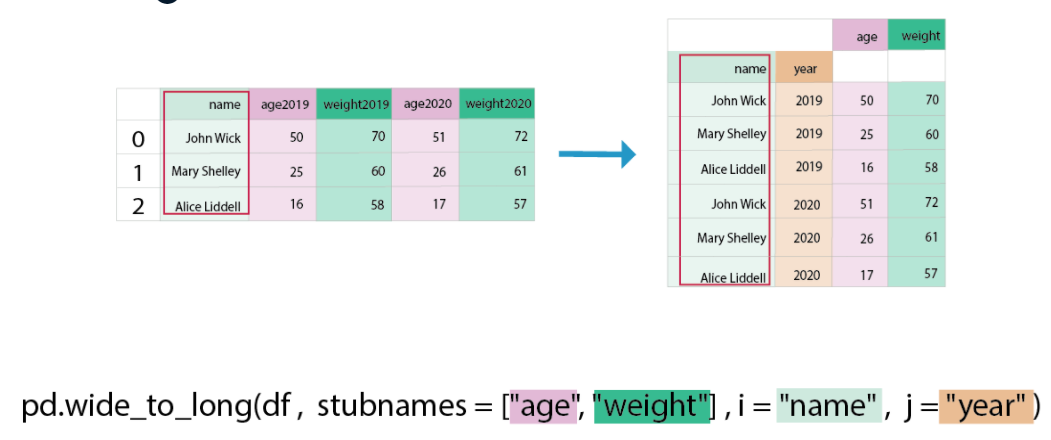

# If we apply pd.wide_to_long to the dataframe with index, the index will disappear. ต้อง reset index ออกมาก่อน

## **The golden age**

The dataset `golden_age` needs reshaping. You noticed that some column names start with the same prefix (stub names) and identified other columns to use as unique IDs.

For that reason, you'll reshape your DataFrame in several ways. Use the function `pd.wide_to_long()` along with each instruction.

* Set `title` as the unique index. Extract the prefix from `isbn10` and `isbn13`. Name the new variable created `version`.

* Set `title` and `authors` as the index. Get the prefix from `prefix10` and `prefix13`. Name the new variable `version`.

* Set `title` and `authors` as unique indexes. Extract the prefixes `isbn` and `prefix`. Name the new variable `version`.

In [31]:
golden_age = pd.DataFrame({'title':['The Great Gatsby', 'The Short Stories', 'To the Lighthouse'], 'authors':['F. Scott Fitzgerald', 'Ernest Hemingway', 'Virginia Woolf'], 'isbn13': [9780060098919, 9780684837864, 9780156030472], 'isbn10':[1572702567,  684837862,  156030470], 'prefix13': [978, 978, 978], 'prefix10':[1, 0, 0]})
display(golden_age)
print("\n\n")

# Reshape wide to long using title as index and version as new name, and extracting isbn prefix 
isbn_long = pd.wide_to_long(golden_age, stubnames="isbn", i="title", j="version")
display(isbn_long)
print("\n\n")

# Reshape wide to long using title and authors as index and version as new name, and prefix as wide column prefix
prefix_long = pd.wide_to_long(golden_age, stubnames="prefix", i=["title", "authors"], j="version")
display(prefix_long)
print("\n\n")

# Reshape wide to long using title and authors as index and version as new name, and prefix and isbn as wide column prefixes
all_long = pd.wide_to_long(golden_age, stubnames=["isbn", "prefix"], i=["title", "authors"], j="version")
display(all_long)

,title,authors,isbn13,isbn10,prefix13,prefix10
0,The Great Gatsby,F. Scott Fitzgerald,9780060098919,1572702567,978,1
1,The Short Stories,Ernest Hemingway,9780684837864,684837862,978,0
2,To the Lighthouse,Virginia Woolf,9780156030472,156030470,978,0


,,prefix13,authors,prefix10,isbn
title,version,,,,
The Great Gatsby,13,978,F. Scott Fitzgerald,1,9780060098919
The Short Stories,13,978,Ernest Hemingway,0,9780684837864
To the Lighthouse,13,978,Virginia Woolf,0,9780156030472
The Great Gatsby,10,978,F. Scott Fitzgerald,1,1572702567
The Short Stories,10,978,Ernest Hemingway,0,684837862
To the Lighthouse,10,978,Virginia Woolf,0,156030470


isbn10  ...  prefix
title             authors             version              ...        
The Great Gatsby  F. Scott Fitzgerald 13       1572702567  ...     978
                                      10       1572702567  ...       1
The Short Stories Ernest Hemingway    13        684837862  ...     978
                                      10        684837862  ...       0
To the Lighthouse Virginia Woolf      13        156030470  ...     978
                                      10        156030470  ...       0

[6 rows x 3 columns]

isbn  prefix
title             authors             version                       
The Great Gatsby  F. Scott Fitzgerald 13       9780060098919     978
                                      10          1572702567       1
The Short Stories Ernest Hemingway    13       9780684837864     978
                                      10           684837862       0
To the Lighthouse Virginia Woolf      13       9780156030472     978
                                      10           156030470       0

## **Decrypting the code**

You explored the dataset `books_brown` and it needs reshaping. Again, you identified several columns to use as unique IDs and realized something different about the columns to group. Their name starts with a prefix, but this time, you identified a suffix and a separation element.

* Reshape `books_brown` from wide to long format, using the columns `author` and `title` as unique indexes. Name `'code'` the new column created from the columns starting with `language` and `publisher`. 
* Inside the `wide_to_long()` call, specify an underscore as the separator between the variable names in the wide columns.
* Inside the `wide_to_long()` call, specify that the wide column names end in a word.

In [37]:
books_brown = pd.DataFrame({"title": ['The Da Vinci Code', 'Angels & Demons', 'La fortaleza digital'],
                            "author": ['Dan Brown', 'Dan Brown', 'Dan Brown'],
                            "language_code": [0, 0, 84],
                            "language_name": ['english', 'english', 'spanish'],
                            "publisher_code": [12, 34, 43],
                            "publisher_name": ['Random House', 'Pocket Books', 'Umbriel']})
display(books_brown)
print("\n\n")

# Reshape using author and title as index, code as new name and getting the prefix language and publisher
the_code_long = pd.wide_to_long(books_brown, stubnames=["language", "publisher"], i=["author", "title"], j="code")
display(the_code_long) # should be empty
print("\n\n")

# Specify underscore as the character that separates the variable names
the_code_long = pd.wide_to_long(books_brown, stubnames=['language', 'publisher'], i=['author', 'title'], j='code', sep="_")
display(the_code_long) # still empty
print("\n\n")

# Specify that wide columns have a suffix containing words
the_code_long = pd.wide_to_long(books_brown, stubnames=['language', 'publisher'], i=['author', 'title'], j='code', sep='_', suffix="\w+")
display(the_code_long)

,title,author,language_code,language_name,publisher_code,publisher_name
0,The Da Vinci Code,Dan Brown,0,english,12,Random House
1,Angels & Demons,Dan Brown,0,english,34,Pocket Books
2,La fortaleza digital,Dan Brown,84,spanish,43,Umbriel


,,,language_code,language_name,publisher_code,publisher_name,language,publisher
author,title,code,,,,,,


,,,language_code,language_name,publisher_code,publisher_name,language,publisher
author,title,code,,,,,,


language     publisher
author    title                code                       
Dan Brown The Da Vinci Code    code        0            12
                               name  english  Random House
          Angels & Demons      code        0            34
                               name  english  Pocket Books
          La fortaleza digital code       84            43
                               name  spanish       Umbriel

## **Time to read, Katniss! (When dataframe contains index)**

The index of the DataFrame contains the title of the books. You know that you cannot reshape it in this format. If you do, you will lose valuable data, the title, so you'll need to make some changes before transforming the DataFrame.

* Modify the `books_hunger` DataFrame by resetting the index without dropping it.
* Reshape `books_hunger` from wide to long format. Use the columns `title` and `language` as unique indexes. Name `feature` the new variable created from the columns that starts with `publication` and `page`. Those columns are separated by a blank space and end in a word.

In [41]:
books_hunger = pd.DataFrame({"title":['Los Juegos del Hambre', 'Catching Fire', 'Il canto della rivolta'],
                             "language": ['Spanish', 'English', 'Italian'],
                             "publication date": ['5/25/2010', '5/25/2012', '6/8/2015'],
                             "publication number": [2, 6, 4],
                             "page number": [374, 391, 390]}).set_index("title")
display(books_hunger)
print("\n\n")

# Modify books_hunger by resetting the index without dropping it
books_hunger.reset_index(drop=False, inplace=True)

# Reshape using title and language as index, feature as new name, publication and page as prefix separated by space and ending in a word
publication_features = pd.wide_to_long(books_hunger, stubnames=["publication", "page"], i=["title", "language"], j="feature", sep=" ", suffix="\w+")

# Print publication_features
display(publication_features)

,language,publication date,publication number,page number
title,,,,
Los Juegos del Hambre,Spanish,5/25/2010,2,374
Catching Fire,English,5/25/2012,6,391
Il canto della rivolta,Italian,6/8/2015,4,390


publication   page
title                  language feature                   
Los Juegos del Hambre  Spanish  date      5/25/2010    NaN
                                number            2  374.0
Catching Fire          English  date      5/25/2012    NaN
                                number            6  391.0
Il canto della rivolta Italian  date       6/8/2015    NaN
                                number            4  390.0

### Missing values appear if you don't have a column for a particular prefix and suffix combination.

## **Did you say dystopia? (Strings split and concat in df)**

But first, you need to do some string manipulations. You realize that the DataFrame index contains data about the title and the release year. You can't find a column with the author of the book, so you decide to pre-define a list of the writers. Then, you want to delete the year and replace it with the author.

You decide that splitting the index and then concatenating it with the list is the best way to do it.

* Split the string separated by a hyphen contained in the index of `books_dys`. Assign it to the index.

* Now that you've split the index, get the first element and assign it to the index of `books_dys`.

* Concatenate the current index of `books_dys` with the pre-defined `author_list`, using a hyphen as a separating element. Assign it to the index.

In [66]:
author_list = ['Ray Bradbury', 'George Orwell', 'Aldous Huxley']
books_dys = pd.DataFrame({"title": ['Fahrenheit 451-1953', '1984-1949', 'Brave New World-1932'],
                          "year": [1953, 1949, 1932],
                          "num_pages": [186, 268, 123],
                          "average_rating": [4.1,  4.31, 4.3 ],
                          "ratings_count": [23244, 14353, 23535]}).set_index("title")
display(books_dys)
print("\n\n")

# Split the index of books_dys by the hyphen 
books_dys.index = books_dys.index.str.split("-")
display(books_dys)
print("\n\n")

# Get the first element after splitting the index of books_dys
books_dys.index = books_dys.index.str.get(0)
display(books_dys)
print("\n\n")

# Concatenate the index with the list author_list separated by a hyphen
books_dys.index = books_dys.index.str.cat(author_list, sep='-')
display(books_dys)

,year,num_pages,average_rating,ratings_count
title,,,,
Fahrenheit 451-1953,1953,186,4.10,23244
1984-1949,1949,268,4.31,14353
Brave New World-1932,1932,123,4.30,23535


,year,num_pages,average_rating,ratings_count
title,,,,
"[Fahrenheit 451, 1953]",1953,186,4.10,23244
"[1984, 1949]",1949,268,4.31,14353
"[Brave New World, 1932]",1932,123,4.30,23535


,year,num_pages,average_rating,ratings_count
title,,,,
Fahrenheit 451,1953,186,4.10,23244
1984,1949,268,4.31,14353
Brave New World,1932,123,4.30,23535


,year,num_pages,average_rating,ratings_count
title,,,,
Fahrenheit 451-Ray Bradbury,1953,186,4.10,23244
1984-George Orwell,1949,268,4.31,14353
Brave New World-Aldous Huxley,1932,123,4.30,23535


## **What's your rating, Harry?**

You realized that you need a long format, but the dataset `hp_books` is in a wide format. You want to melt the data, but first, you need to manipulate some of the string columns.

The full title is divided into two columns. The authors column contains info about the writer and the illustrator.

* Concatenate the `title` and `subtitle` columns into a column named `full_title`. Use the word `'and'` separated by spaces as a separating element.
* Split the `authors` column into two columns called `writer` and `illustrator`. Use the slash character `/` as the delimiter.
* Define a DataFrame `hp_melt` by melting the `goodreads` and `amazon` columns into a single column named `source`. Assign the name `rating` to the resulting value column. Use only the full title and the writer as identifier variables.

In [71]:
hp_books = pd.DataFrame({"title": ['Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry Potter', 'Harry Potter'],
                         "subtitle": ['the Half-Blood Prince ', 'the Order of the Phoenix ', 'the Chamber of Secrets ', 'the Prisoner of Azkaban ', 'The Deathly Hallows', "the Sorcerer's Stone ", 'the Goblet of Fire '],
                         "authors": ['J.K. Rowling/Mary GrandPré', 'J.K. Rowling/Mary GrandPré', 'J.K. Rowling', 'J.K. Rowling/Mary GrandPré', 'J.K. Rowling/Mary GrandPré', 'J.K. Rowling/Mary GrandPré', 'J.K. Rowling'],
                         "goodreads": [4.57, 4.49, 4.42, 4.56, 4.42, 4.47, 4.56],
                         "amazon": [4.52, 4.44, 4.37, 4.51, 4.37, 4.42, 4.51]})
display(hp_books)
print("\n\n")

# Concatenate the title and subtitle separated by "and" surrounded by spaces
hp_books['full_title'] = hp_books["title"].str.cat(hp_books["subtitle"], sep =" and ") 
display(hp_books)
print("\n\n")

# Split the authors into writer and illustrator columns
hp_books[['writer', 'illustrator']] = hp_books["authors"].str.split("/", expand=True) 
display(hp_books)
print("\n\n")


# Melt goodreads and amazon columns into a single column
hp_melt = hp_books.melt(id_vars=["full_title", "writer"], var_name="source", value_vars=["goodreads", "amazon"], value_name="rating")
display(hp_melt)

,title,subtitle,authors,goodreads,amazon
0,Harry Potter,the Half-Blood Prince,J.K. Rowling/Mary GrandPré,4.57,4.52
1,Harry Potter,the Order of the Phoenix,J.K. Rowling/Mary GrandPré,4.49,4.44
2,Harry Potter,the Chamber of Secrets,J.K. Rowling,4.42,4.37
3,Harry Potter,the Prisoner of Azkaban,J.K. Rowling/Mary GrandPré,4.56,4.51
4,Harry Potter,The Deathly Hallows,J.K. Rowling/Mary GrandPré,4.42,4.37
5,Harry Potter,the Sorcerer's Stone,J.K. Rowling/Mary GrandPré,4.47,4.42
6,Harry Potter,the Goblet of Fire,J.K. Rowling,4.56,4.51


,title,subtitle,authors,goodreads,amazon,full_title
0,Harry Potter,the Half-Blood Prince,J.K. Rowling/Mary GrandPré,4.57,4.52,Harry Potter and the Half-Blood Prince
1,Harry Potter,the Order of the Phoenix,J.K. Rowling/Mary GrandPré,4.49,4.44,Harry Potter and the Order of the Phoenix
2,Harry Potter,the Chamber of Secrets,J.K. Rowling,4.42,4.37,Harry Potter and the Chamber of Secrets
3,Harry Potter,the Prisoner of Azkaban,J.K. Rowling/Mary GrandPré,4.56,4.51,Harry Potter and the Prisoner of Azkaban
4,Harry Potter,The Deathly Hallows,J.K. Rowling/Mary GrandPré,4.42,4.37,Harry Potter and The Deathly Hallows
5,Harry Potter,the Sorcerer's Stone,J.K. Rowling/Mary GrandPré,4.47,4.42,Harry Potter and the Sorcerer's Stone
6,Harry Potter,the Goblet of Fire,J.K. Rowling,4.56,4.51,Harry Potter and the Goblet of Fire


,title,subtitle,authors,goodreads,amazon,full_title,writer,illustrator
0,Harry Potter,the Half-Blood Prince,J.K. Rowling/Mary GrandPré,4.57,4.52,Harry Potter and the Half-Blood Prince,J.K. Rowling,Mary GrandPré
1,Harry Potter,the Order of the Phoenix,J.K. Rowling/Mary GrandPré,4.49,4.44,Harry Potter and the Order of the Phoenix,J.K. Rowling,Mary GrandPré
2,Harry Potter,the Chamber of Secrets,J.K. Rowling,4.42,4.37,Harry Potter and the Chamber of Secrets,J.K. Rowling,None
3,Harry Potter,the Prisoner of Azkaban,J.K. Rowling/Mary GrandPré,4.56,4.51,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,Mary GrandPré
4,Harry Potter,The Deathly Hallows,J.K. Rowling/Mary GrandPré,4.42,4.37,Harry Potter and The Deathly Hallows,J.K. Rowling,Mary GrandPré
5,Harry Potter,the Sorcerer's Stone,J.K. Rowling/Mary GrandPré,4.47,4.42,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Mary GrandPré
6,Harry Potter,the Goblet of Fire,J.K. Rowling,4.56,4.51,Harry Potter and the Goblet of Fire,J.K. Rowling,None


,full_title,writer,source,rating
0,Harry Potter and the Half-Blood Prince,J.K. Rowling,goodreads,4.57
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,goodreads,4.49
2,Harry Potter and the Chamber of Secrets,J.K. Rowling,goodreads,4.42
3,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,goodreads,4.56
4,Harry Potter and The Deathly Hallows,J.K. Rowling,goodreads,4.42
5,Harry Potter and the Sorcerer's Stone,J.K. Rowling,goodreads,4.47
6,Harry Potter and the Goblet of Fire,J.K. Rowling,goodreads,4.56
7,Harry Potter and the Half-Blood Prince,J.K. Rowling,amazon,4.52
8,Harry Potter and the Order of the Phoenix,J.K. Rowling,amazon,4.44
9,Harry Potter and the Chamber of Secrets,J.K. Rowling,amazon,4.37


## **Elementary, dear Watson!**

The dataset, `books_sh` have columns that can be grouped using a prefix. You identify the columns to use as unique IDs. However, some of these columns contain strings. They need some manipulation before applying a wide to long transformation. You decide some of the strings need splitting to make the DataFrame cleaner.

* Split the `main_title` column into two columns called `title` and `subtitle`. Use a colon as the delimiter.
* Split the string separated by a blank space contained in the `version` column. Assign the second element to a new column called `volume`.
* Drop the columns named `main_title` and `version`, modifying the `books_sh` DataFrame.
* Reshape from wide to long using the `title`, `subtitle`, and `volume` as unique indexes. Use the name `feature` for the new variable created from the columns that start with `number`. The columns are separated by an underscore and end in a word.

In [76]:
books_sh = pd.DataFrame({"main_title": ['Sherlock Holmes: The Complete Novels','Sherlock Holmes: The Complete Novels','Adventures of Sherlock Holmes: Memoirs','Adventures of Sherlock Holmes: Memoirs'],
                         "version": ['Vol I', 'Vol II', 'Vol I', 'Vol II'],
                         "number_pages": [1059,  709,  334,  238],
                         "number_ratings": [24087, 26794,  2184,  1884]})
display(books_sh)
print("\n\n")

# Split main_title by a colon and assign it to two columns named title and subtitle 
books_sh[['title', 'subtitle']] = books_sh["main_title"].str.split(": ", expand=True)
display(books_sh)
print("\n\n")

# Split version by a space and assign the second element to the column named volume
books_sh['volume'] = books_sh['version'].str.split(' ').str.get(1)
display(books_sh)
print("\n\n")

# Drop the main_title and version columns modifying books_sh
books_sh.drop(['main_title', 'version'], axis=1, inplace=True)
display(books_sh)
print("\n\n")

# Reshape using title, subtitle and volume as index, name feature the new variable from columns starting with number, separated by undescore and ending in words 
sh_long = pd.wide_to_long(books_sh, stubnames="number", i=["title", "subtitle", "volume"], j="feature", sep="_", suffix="\w+")
display(sh_long)

,main_title,version,number_pages,number_ratings
0,Sherlock Holmes: The Complete Novels,Vol I,1059,24087
1,Sherlock Holmes: The Complete Novels,Vol II,709,26794
2,Adventures of Sherlock Holmes: Memoirs,Vol I,334,2184
3,Adventures of Sherlock Holmes: Memoirs,Vol II,238,1884


,main_title,version,number_pages,number_ratings,title,subtitle
0,Sherlock Holmes: The Complete Novels,Vol I,1059,24087,Sherlock Holmes,The Complete Novels
1,Sherlock Holmes: The Complete Novels,Vol II,709,26794,Sherlock Holmes,The Complete Novels
2,Adventures of Sherlock Holmes: Memoirs,Vol I,334,2184,Adventures of Sherlock Holmes,Memoirs
3,Adventures of Sherlock Holmes: Memoirs,Vol II,238,1884,Adventures of Sherlock Holmes,Memoirs


,main_title,version,number_pages,number_ratings,title,subtitle,volume
0,Sherlock Holmes: The Complete Novels,Vol I,1059,24087,Sherlock Holmes,The Complete Novels,I
1,Sherlock Holmes: The Complete Novels,Vol II,709,26794,Sherlock Holmes,The Complete Novels,II
2,Adventures of Sherlock Holmes: Memoirs,Vol I,334,2184,Adventures of Sherlock Holmes,Memoirs,I
3,Adventures of Sherlock Holmes: Memoirs,Vol II,238,1884,Adventures of Sherlock Holmes,Memoirs,II


,number_pages,number_ratings,title,subtitle,volume
0,1059,24087,Sherlock Holmes,The Complete Novels,I
1,709,26794,Sherlock Holmes,The Complete Novels,II
2,334,2184,Adventures of Sherlock Holmes,Memoirs,I
3,238,1884,Adventures of Sherlock Holmes,Memoirs,II


number
title                         subtitle            volume feature        
Sherlock Holmes               The Complete Novels I      pages      1059
                                                         ratings   24087
                                                  II     pages       709
                                                         ratings   26794
Adventures of Sherlock Holmes Memoirs             I      pages       334
                                                         ratings    2184
                                                  II     pages       238
                                                         ratings    1884

# **Stack and Unstack Method**

* `.stack()` จะดึงคอลัมน์ลงมา ทำให้เกิด MultiIndex ขึ้น

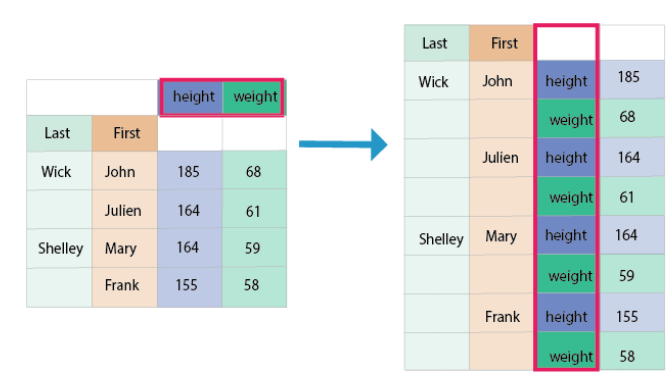


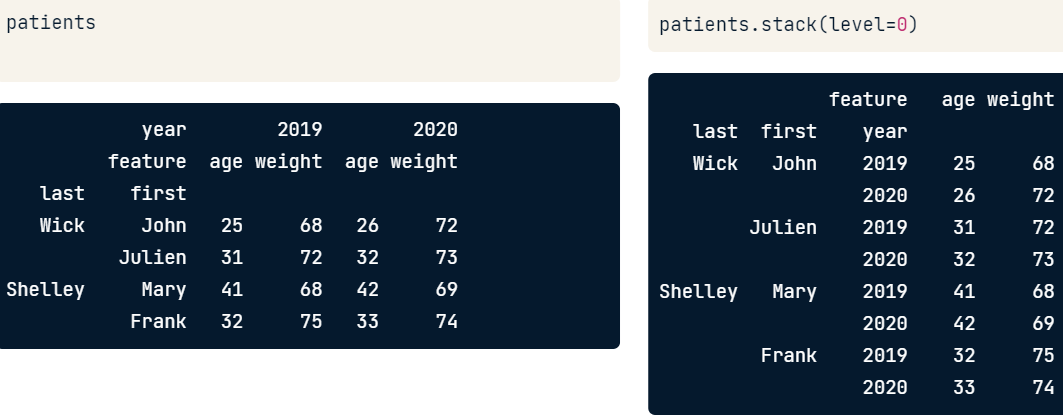



## **Stack the calls!**

The dataset contains data about the total number of calls and the minutes spent on the phone by different customers. However, the state and city they live in are not listed.

* Create a new multi-level index using the `new_index` list and the appropriate `pandas` method. Name the levels `state` and `city` respectively.
* Assign the multi-level index contained in `churn_new` as the index of the `churn` DataFrame.
* Reshape the churn DataFrame by stacking and assign it to `churn_stack`.

In [7]:
import pandas as pd

# Predefined list to use as index
new_index = [['California', 'California', 'New York', 'Ohio'], 
             ['Los Angeles', 'San Francisco', 'New York', 'Cleveland']]

churn = pd.DataFrame({"Area code": [408, 408, 415, 510],
                     "total_day_calls": [116, 109,  84,  67],
                     "total_day_minutes": [204, 287,  84,  50]})
display(churn)
print("\n\n")

# Create a multi-level index using predefined new_index
churn_new = pd.MultiIndex.from_arrays(new_index, names=["state", "city"])

# Print churn_new
display(churn_new)
print("\n\n")

# Assign the new index to the churn index
churn.index = churn_new
display(churn)
print("\n\n")

# Reshape by stacking churn DataFrame
churn_stack = churn.stack()
display(churn_stack)

,Area code,total_day_calls,total_day_minutes
0,408,116,204
1,408,109,287
2,415,84,84
3,510,67,50


MultiIndex([('California',   'Los Angeles'),
            ('California', 'San Francisco'),
            (  'New York',      'New York'),
            (      'Ohio',     'Cleveland')],
           names=['state', 'city'])

Area code  total_day_calls  total_day_minutes
state      city                                                        
California Los Angeles          408              116                204
           San Francisco        408              109                287
New York   New York             415               84                 84
Ohio       Cleveland            510               67                 50

state       city                            
California  Los Angeles    Area code            408
                           total_day_calls      116
                           total_day_minutes    204
            San Francisco  Area code            408
                           total_day_calls      109
                           total_day_minutes    287
New York    New York       Area code            415
                           total_day_calls       84
                           total_day_minutes     84
Ohio        Cleveland      Area code            510
                           total_day_calls       67
                           total_day_minutes     50
dtype: int64

## **Phone directory index**

The dataset contains a multi-level index in the columns. You'd like to have some columns set as the row index. Also, this time you will only stack some levels. You believe it will help you discover some patterns in the data.

* Set the columns `state` and `city` as the index of `churn`, modifying the DataFrame in-place.
* Create a new `churn_stack` DataFrame by stacking the second column level of the `churn` DataFrame.

In [18]:
columns = pd.MultiIndex.from_arrays([['state', 'city', 'night', 'night', 'day', 'day'],
                                     ['', '', 'total calls', 'total minutes', 'total calls', 'total minutes']])
data = [['California', 'Los Angeles', 116, 204, 85, 107],
       ['California', 'San Francisco', 109, 287, 90, 167],
       ['New York', 'New York', 84, 84, 75, 90],
       ['Ohio', 'Cleveland', 67, 50, 67, 110]]

churn = pd.DataFrame(data=data, columns=columns)
display(churn)
print('\n\n')

# Set state and city as index modifying the DataFrame
churn.set_index(["state", "city"], inplace=True)
display(churn)
print('\n\n')

# Reshape by stacking the second level
churn_stack = churn.stack()
display(churn_stack)


state           city  ...         day              
                              ... total calls total minutes
0  California    Los Angeles  ...          85           107
1  California  San Francisco  ...          90           167
2    New York       New York  ...          75            90
3        Ohio      Cleveland  ...          67           110

[4 rows x 6 columns]

night                       day              
                         total calls total minutes total calls total minutes
state      city                                                             
California Los Angeles           116           204          85           107
           San Francisco         109           287          90           167
New York   New York               84            84          75            90
Ohio       Cleveland              67            50          67           110

day  night
state      city                                   
California Los Angeles   total calls     85    116
                         total minutes  107    204
           San Francisco total calls     90    109
                         total minutes  167    287
New York   New York      total calls     75     84
                         total minutes   90     84
Ohio       Cleveland     total calls     67     67
                         total minutes  110     50

Choosing which level to stack can help you discover patterns. In this case, you can see how the total number of calls and minutes spent differ between day and night.

## **Text me!**

* Reshape the `churn` DataFrame by stacking the `time` column level. Assign the reshaped DataFrame to `churn_time`.

* Now, define a reshaped DataFrame called `churn_feature` by stacking the `feature` column level of the `churn` DataFrame.

In [30]:
index = pd.MultiIndex.from_arrays([['California', 'California', 'New York', 'Ohio'],
                                   ['Los Angeles', 'San Francisco', 'New York', 'Cleveland']], names=["state", "city"])
columns = pd.MultiIndex.from_arrays([['day', 'day', 'night', 'night'],
                                     ['text messages', 'total GB', 'text messages', 'total GB']], names=["time", "feature"])
data = [[ 20,   5,  30,  10],
       [ 40,   5, 100,   5],
       [ 50,   2,  20,   9],
       [100,   3,  40,   6]]

churn = pd.DataFrame(data=data, index=index, columns=columns)
display(churn)
print("\n\n")

# Stack churn by the time column level
churn_time = churn.stack(level="time")
display(churn_time)
print("\n\n")

# Stack churn by the feature column level
churn_feature = churn.stack(level="feature")
display(churn_feature)

time                               day                  night         
feature                  text messages total GB text messages total GB
state      city                                                       
California Los Angeles              20        5            30       10
           San Francisco            40        5           100        5
New York   New York                 50        2            20        9
Ohio       Cleveland               100        3            40        6

feature                         text messages  total GB
state      city          time                          
California Los Angeles   day               20         5
                         night             30        10
           San Francisco day               40         5
                         night            100         5
New York   New York      day               50         2
                         night             20         9
Ohio       Cleveland     day              100         3
                         night             40         6

time                                    day  night
state      city          feature                  
California Los Angeles   text messages   20     30
                         total GB         5     10
           San Francisco text messages   40    100
                         total GB         5      5
New York   New York      text messages   50     20
                         total GB         2      9
Ohio       Cleveland     text messages  100     40
                         total GB         3      6

Stacking different levels helps you discover patterns in the data. For example, you can see that customers use more internet at night. 

# **Unstack**

## **International caller**

You explore the `churn` dataset, which contains a multi-level row index. Again, you will reshape the data, as you expect it will help you to do further analysis.

* Reshape the churn DataFrame by unstacking the last row level. Assign it to `churn_unstack`.

* Create a reshaped DataFrame called `churn_first` by unstacking the first row level of churn.

* Define a new DataFrame called `churn_second` by unstacking the second row level of churn.

In [36]:
index = pd.MultiIndex.from_arrays([['day', 'day', 'night', 'night', 'eve', 'eve'],
                                   ['International', 'National', 'International', 'National', 'International', 'National'],
                                   ['churn', 'churn', 'churn', 'no churn', 'no churn', 'no churn']], names=["time", "type", "exited"])

columns = pd.Index(['minutes', 'calls', 'charge'])
data = [[184.5 ,  97.  ,  31.37],
       [129.1 , 137.  ,  21.95],
       [332.9 ,  67.  ,  56.59],
       [110.4 , 103.  ,  18.77],
       [119.3 , 117.  ,  20.28],
       [137.1 ,  88.  ,  23.31]]

churn = pd.DataFrame(index=index, columns=columns, data=data)
display(churn)
print("\n\n")

# Reshape the churn DataFrame by unstacking
churn_unstack = churn.unstack()
display(churn_unstack)

# Reshape churn by unstacking the first row level
churn_first = churn.unstack(level=0)

# Print churn_zero
display(churn_first)
print("\n\n")



minutes  calls  charge
time  type          exited                          
day   International churn       184.5   97.0   31.37
      National      churn       129.1  137.0   21.95
night International churn       332.9   67.0   56.59
      National      no churn    110.4  103.0   18.77
eve   International no churn    119.3  117.0   20.28
      National      no churn    137.1   88.0   23.31

minutes           calls          charge         
exited                churn no churn  churn no churn  churn no churn
time  type                                                          
day   International   184.5      NaN   97.0      NaN  31.37      NaN
      National        129.1      NaN  137.0      NaN  21.95      NaN
eve   International     NaN    119.3    NaN    117.0    NaN    20.28
      National          NaN    137.1    NaN     88.0    NaN    23.31
night International   332.9      NaN   67.0      NaN  56.59      NaN
      National          NaN    110.4    NaN    103.0    NaN    18.77

minutes                calls  ...        charge              
time                       day    eve  night    day  ...  night    day    eve  night
type          exited                                 ...                            
International churn      184.5    NaN  332.9   97.0  ...   67.0  31.37    NaN  56.59
              no churn     NaN  119.3    NaN    NaN  ...    NaN    NaN  20.28    NaN
National      churn      129.1    NaN    NaN  137.0  ...    NaN  21.95    NaN    NaN
              no churn     NaN  137.1  110.4    NaN  ...  103.0    NaN  23.31  18.77

[4 rows x 9 columns]

`.unstack()` method reshapes the last level by default. Notice how unstacking levels can lead to some missing values.

## **Call another time**

* Reshape the `churn` DataFrame by unstacking the `time` level. Assign it to `churn_time`.
* Now, sort the index of the resulting reshaped `churn` in descending order.

In [37]:
index = pd.MultiIndex.from_arrays([['day', 'day', 'night', 'night', 'eve', 'eve'],
                                   ['International', 'National', 'International', 'National', 'International', 'National'],
                                   ['churn', 'churn', 'churn', 'no churn', 'no churn', 'no churn']], names=["time", "type", "exited"])

columns = pd.Index(['minutes', 'calls', 'charge'])
data = [[184.5 ,  97.  ,  31.37],
       [129.1 , 137.  ,  21.95],
       [332.9 ,  67.  ,  56.59],
       [110.4 , 103.  ,  18.77],
       [119.3 , 117.  ,  20.28],
       [137.1 ,  88.  ,  23.31]]

churn = pd.DataFrame(index=index, columns=columns, data=data)
display(churn)
print("\n\n")

# Unstack the time level from churn
churn_time = churn.unstack(level="time")
display(churn_time)
print("\n\n")

# Sort the index in descending order
churn_time = churn.unstack(level='time').sort_index(ascending=False)

# Print churn_time
display(churn_time)


minutes  calls  charge
time  type          exited                          
day   International churn       184.5   97.0   31.37
      National      churn       129.1  137.0   21.95
night International churn       332.9   67.0   56.59
      National      no churn    110.4  103.0   18.77
eve   International no churn    119.3  117.0   20.28
      National      no churn    137.1   88.0   23.31

minutes                calls  ...        charge              
time                       day    eve  night    day  ...  night    day    eve  night
type          exited                                 ...                            
International churn      184.5    NaN  332.9   97.0  ...   67.0  31.37    NaN  56.59
              no churn     NaN  119.3    NaN    NaN  ...    NaN    NaN  20.28    NaN
National      churn      129.1    NaN    NaN  137.0  ...    NaN  21.95    NaN    NaN
              no churn     NaN  137.1  110.4    NaN  ...  103.0    NaN  23.31  18.77

[4 rows x 9 columns]

minutes                calls  ...        charge              
time                       day    eve  night    day  ...  night    day    eve  night
type          exited                                 ...                            
National      no churn     NaN  137.1  110.4    NaN  ...  103.0    NaN  23.31  18.77
              churn      129.1    NaN    NaN  137.0  ...    NaN  21.95    NaN    NaN
International no churn     NaN  119.3    NaN    NaN  ...    NaN    NaN  20.28    NaN
              churn      184.5    NaN  332.9   97.0  ...   67.0  31.37    NaN  56.59

[4 rows x 9 columns]

## **Organizing your voicemail**

Reorganize a row index as a column index. After that, move a column index to a row index. To do this, you will first unstack the DataFrame, and then stack it.

* Reshape `churn` by unstacking the `type` level. Assign it to `churn_type`. 
* Stack the resulting DataFrame using the first column level.

In [38]:
index = pd.MultiIndex.from_arrays([['day', 'day', 'night', 'night', 'eve', 'eve'],
                                   ['International', 'National', 'International', 'National', 'International', 'National'],
                                   ['churn', 'churn', 'churn', 'no churn', 'no churn', 'no churn']], names=["time", "type", "exited"])

columns = pd.Index(['minutes', 'calls', 'charge'])
data = [[184.5 ,  97.  ,  31.37],
       [129.1 , 137.  ,  21.95],
       [332.9 ,  67.  ,  56.59],
       [110.4 , 103.  ,  18.77],
       [119.3 , 117.  ,  20.28],
       [137.1 ,  88.  ,  23.31]]

churn = pd.DataFrame(index=index, columns=columns, data=data)
display(churn)
print("\n\n")


# Unstack churn by type level
churn_type = churn.unstack(level="type")
display(churn_type)
print("\n\n")

# Stack the resulting DataFrame using the first column level
churn_final = churn_type.stack(level=0)
display(churn_final)

minutes  calls  charge
time  type          exited                          
day   International churn       184.5   97.0   31.37
      National      churn       129.1  137.0   21.95
night International churn       332.9   67.0   56.59
      National      no churn    110.4  103.0   18.77
eve   International no churn    119.3  117.0   20.28
      National      no churn    137.1   88.0   23.31

minutes           ...        charge         
type           International National  ... International National
time  exited                           ...                       
day   churn            184.5    129.1  ...         31.37    21.95
eve   no churn         119.3    137.1  ...         20.28    23.31
night churn            332.9      NaN  ...         56.59      NaN
      no churn           NaN    110.4  ...           NaN    18.77

[4 rows x 6 columns]

type                    International  National
time  exited                                   
day   churn    calls            97.00    137.00
               charge           31.37     21.95
               minutes         184.50    129.10
eve   no churn calls           117.00     88.00
               charge           20.28     23.31
               minutes         119.30    137.10
night churn    calls            67.00       NaN
               charge           56.59       NaN
               minutes         332.90       NaN
      no churn calls              NaN    103.00
               charge             NaN     18.77
               minutes            NaN    110.40

# **Stack and Unstack Multi Level Index or Columns at the same time**

## **Swap your SIM card**

The `churn` dataset has row levels that are not well organized. First, you want to rearrange your row indices so it's easier to reshape your DataFrame.

* Switch the first and the third row index levels of `churn`. Assign it to `churn_swap`.
* Reshape the `churn` DataFrame by unstacking the last level. Assign it to `churn_unstack`.

In [41]:
index = pd.MultiIndex.from_arrays([['churn', 'no_churn', 'churn', 'no_churn'],
                                   ['California', 'California', 'New York', 'New York'],
                                   ['Los Angeles', 'Los Angeles', 'New York', 'New York']], names=["exited", "state", "city"])

columns = pd.MultiIndex.from_arrays([['2019', '2019', '2019', '2020', '2020', '2020'],
                                     ['minutes', 'voicemail', 'data', 'minutes', 'voicemail', 'data']], names=["year", "plan"])
data = [[0, 1, 2, 1, 1, 5],
       [0, 1, 3, 1, 0, 2],
       [1, 0, 5, 0, 1, 2],
       [1, 0, 4, 1, 0, 6]]

churn = pd.DataFrame(data=data, index=index, columns=columns)
display(churn)
print("\n\n")

# Switch the first and third row index levels in churn
churn_swap = churn.swaplevel(0, 2)
display(churn_swap)
print("\n\n")

# Reshape by unstacking the last row level 
churn_unstack = churn_swap.unstack()
display(churn_unstack)

year                               2019                   2020               
plan                            minutes voicemail data minutes voicemail data
exited   state      city                                                     
churn    California Los Angeles       0         1    2       1         1    5
no_churn California Los Angeles       0         1    3       1         0    2
churn    New York   New York          1         0    5       0         1    2
no_churn New York   New York          1         0    4       1         0    6

year                               2019                   2020               
plan                            minutes voicemail data minutes voicemail data
city        state      exited                                                
Los Angeles California churn          0         1    2       1         1    5
                       no_churn       0         1    3       1         0    2
New York    New York   churn          1         0    5       0         1    2
                       no_churn       1         0    4       1         0    6

year                      2019                     ...      2020               
plan                   minutes          voicemail  ... voicemail  data         
exited                   churn no_churn     churn  ...  no_churn churn no_churn
city        state                                  ...                         
Los Angeles California       0        0         1  ...         0     5        2
New York    New York         1        1         0  ...         0     2        6

[2 rows x 12 columns]

## **Two many calls**

You plan on switching and rearranging row and column indices by chaining the stacking and unstacking processes. Also, you would like to rearrange several levels at the same time.

* Create a new DataFrame called `churn_unstack` by unstacking the first and second row levels of the DataFrame `churn`.
* Stack the resulting DataFrame using the `plan` and `year` column levels in that order. Assign it to `churn_py`.
* Switch the first and second column levels in the resulting DataFrame. Assign it to `churn_switch`.



In [44]:
index = pd.MultiIndex.from_arrays([['churn', 'no_churn', 'churn', 'no_churn'],
                                   ['California', 'California', 'New York', 'New York'],
                                   ['Los Angeles', 'Los Angeles', 'New York', 'New York']], names=["exited", "state", "city"])

columns = pd.MultiIndex.from_arrays([['2019', '2019', '2019', '2020', '2020', '2020'],
                                     ['minutes', 'voicemail', 'data', 'minutes', 'voicemail', 'data']], names=["year", "plan"])
data = [[0, 1, 2, 1, 1, 5],
       [0, 1, 3, 1, 0, 2],
       [1, 0, 5, 0, 1, 2],
       [1, 0, 4, 1, 0, 6]]

churn = pd.DataFrame(data=data, index=index, columns=columns)
display(churn)
print("\n\n")

# Unstack the first and second row level of churn
churn_unstack = churn.unstack(level=[0, 1])
display(churn_unstack)
print("\n\n")

# Stack the resulting DataFrame using plan and year
churn_py = churn_unstack.stack(['plan', 'year'])
display(churn_py)
print("\n\n")

# Switch the first and second column levels
churn_switch = churn_py.swaplevel(0, 1, axis=1)
display(churn_switch)

year                               2019                   2020               
plan                            minutes voicemail data minutes voicemail data
exited   state      city                                                     
churn    California Los Angeles       0         1    2       1         1    5
no_churn California Los Angeles       0         1    3       1         0    2
churn    New York   New York          1         0    5       0         1    2
no_churn New York   New York          1         0    4       1         0    6

year              2019                      ...     2020                    
plan           minutes                      ...     data                    
exited           churn            no_churn  ...    churn   no_churn         
state       California New York California  ... New York California New York
city                                        ...                             
Los Angeles        0.0      NaN        0.0  ...      NaN        2.0      NaN
New York           NaN      1.0        NaN  ...      2.0        NaN      6.0

[2 rows x 24 columns]

exited                          churn            no_churn         
state                      California New York California New York
city        plan      year                                        
Los Angeles data      2019        2.0      NaN        3.0      NaN
                      2020        5.0      NaN        2.0      NaN
            minutes   2019        0.0      NaN        0.0      NaN
                      2020        1.0      NaN        1.0      NaN
            voicemail 2019        1.0      NaN        1.0      NaN
                      2020        1.0      NaN        0.0      NaN
New York    data      2019        NaN      5.0        NaN      4.0
                      2020        NaN      2.0        NaN      6.0
            minutes   2019        NaN      1.0        NaN      1.0
                      2020        NaN      0.0        NaN      1.0
            voicemail 2019        NaN      0.0        NaN      0.0
                      2020        NaN      1.0        NaN      0.0

state                      California New York California New York
exited                          churn    churn   no_churn no_churn
city        plan      year                                        
Los Angeles data      2019        2.0      NaN        3.0      NaN
                      2020        5.0      NaN        2.0      NaN
            minutes   2019        0.0      NaN        0.0      NaN
                      2020        1.0      NaN        1.0      NaN
            voicemail 2019        1.0      NaN        1.0      NaN
                      2020        1.0      NaN        0.0      NaN
New York    data      2019        NaN      5.0        NaN      4.0
                      2020        NaN      2.0        NaN      6.0
            minutes   2019        NaN      1.0        NaN      1.0
                      2020        NaN      0.0        NaN      1.0
            voicemail 2019        NaN      0.0        NaN      0.0
                      2020        NaN      1.0        NaN      0.0

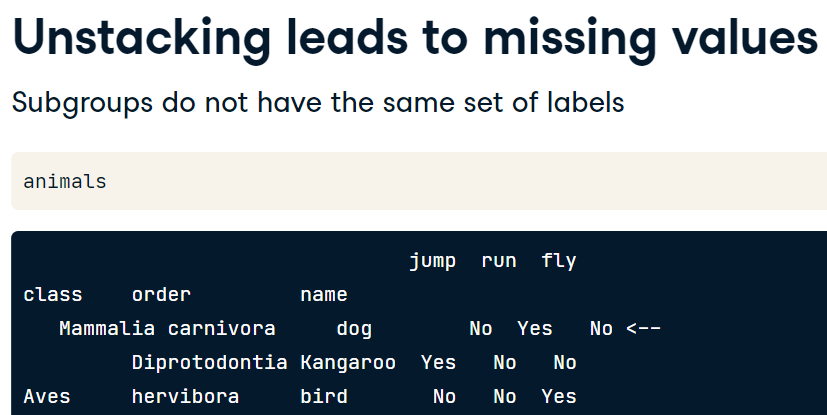

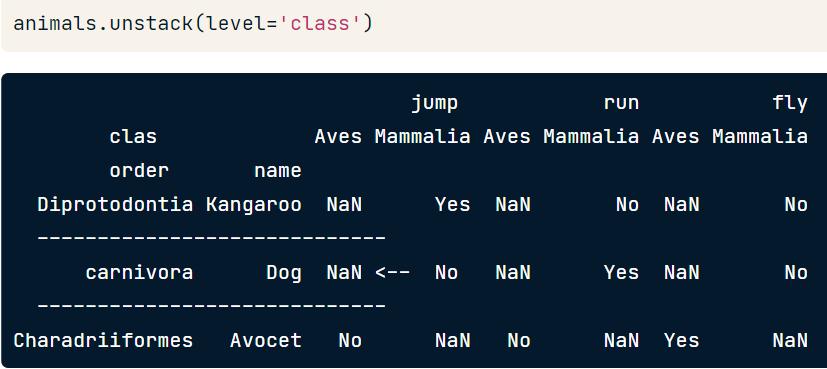

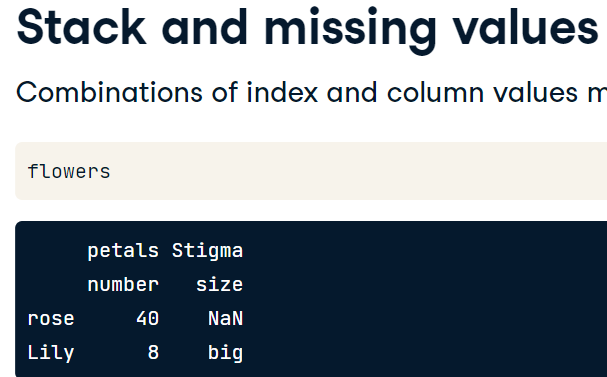

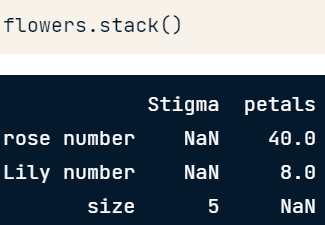

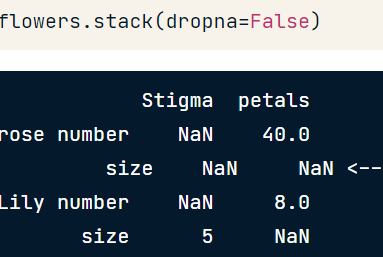

## **A missed phone call (Missing Values from Stack or Unstack)**

Before you fit a classification model, you decide to do something simpler. You want to see what else you can learn from the data. You will reshape your data by unstacking levels, but you know <ins>this process will generate missing data</ins> that you need to handle.

* Reshape the `churn` DataFrame by unstacking the level named `churn`, filling the missing values with `0`.
* Sort the `churn` DataFrame by the `voice_mail_plan` column in descending order, then by `international_plan` column in ascending order.
* Print the final `churn_sorted` DataFrame.

In [50]:
columns = pd.Index(['total_day_calls', 'total_night_calls'])
index = pd.MultiIndex.from_arrays([['LA', 'LA', 'LA', 'NY', 'NY', 'NY', 'NY', 'NY', 'LA', 'LA', 'NY', 'LA'],
['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes'],
[False, True, False, False, True, False, False, True, False, True, False, False]], names=["state", "international_plan", "voice_mail_plan", "churn"])
data = [[106.81818182,  96.90909091],
       [100.        , 119.        ],
       [100.        ,  84.25      ],
       [ 90.9       , 100.8       ],
       [ 95.        , 101.5       ],
       [115.        , 121.        ],
       [109.        ,  99.        ],
       [ 87.        , 113.        ],
       [ 78.        ,  90.        ],
       [ 69.        , 104.        ],
       [120.        ,  78.        ],
       [ 71.        , 101.        ]]

churn = pd.DataFrame(data=data, index=index, columns=columns)
display(churn)
print("\n\n")

# Unstack churn level and fill missing values with zero
churn = churn.unstack(level="churn", fill_value=0)

# Sort by descending voice mail plan and ascending international plan
churn_sorted = churn.sort_index(level=["voice_mail_plan", "international_plan"], 
                          ascending=[False, True])

# Print final DataFrame and observe pattern
display(churn_sorted)

total_day_calls  total_night_calls
state international_plan voice_mail_plan churn                                    
LA    No                 No              False       106.818182          96.909091
                                         True        100.000000         119.000000
                         Yes             False       100.000000          84.250000
NY    No                 No              False        90.900000         100.800000
                                         True         95.000000         101.500000
                         Yes             False       115.000000         121.000000
      Yes                No              False       109.000000          99.000000
                                         True         87.000000         113.000000
LA    Yes                No              False        78.000000          90.000000
                                         True         69.000000         104.000000
NY    Yes                Yes             False       120.000000          78.000000
LA    Yes                Yes             False        71.000000         101.000000

total_day_calls  ... total_night_calls
churn                                              False  ...             True 
state international_plan voice_mail_plan                  ...                  
LA    No                 Yes                  100.000000  ...               0.0
NY    No                 Yes                  115.000000  ...               0.0
LA    Yes                Yes                   71.000000  ...               0.0
NY    Yes                Yes                  120.000000  ...               0.0
LA    No                 No                   106.818182  ...             119.0
NY    No                 No                    90.900000  ...             101.5
LA    Yes                No                    78.000000  ...             104.0
NY    Yes                No                   109.000000  ...             113.0

[8 rows x 4 columns]

Unstacking the `churn` level showed that no customer has churned if they have a voicemail plan. Unstacking levels can lead to missing data, but you handled it easily in this exercise by setting `fill_value` to zero.

## **Don't drop the stack**

Reshape your `churn` data by stacking different levels. You know this process will <ins>generate missing data</ins>. You want to check if it is worth keeping the rows that contain all missing values, or if it's better to drop that information.

* Reshape the `churn` DataFrame by stacking the `type` level. Then, fill the missing values generated with the value `0`.

* Stack the `scope` level of `churn` without dropping the rows with missing values. Then, fill the missing values with `0`.

In [59]:
from numpy import nan

index = pd.Index(['LA', 'NY', 'CA'])
columns = pd.MultiIndex.from_arrays([['total_day_calls', 'total_night_calls', 'total_night_calls'],
                                     ['international', 'international', 'national']], names=["type", "scope"])
data = [[23., 30., nan],
       [ 8., 34., 24.],
       [ 8., 34., 24.]]

churn = pd.DataFrame(data=data, index=index, columns=columns)
churn[[("total_day_calls", 	"international")]] = churn[[("total_day_calls", 	"international")]].astype(int)
churn[[("total_night_calls", 	"international")]] = churn[[("total_night_calls", 	"international")]].astype(int)
display(churn)
print("\n\n")

# Stack the level type from churn
churn_stack = churn.stack(level="type")

# Fill the resulting missing values with zero 
churn_fill = churn_stack.fillna(0)
display(churn_fill)
print("\n\n")

# Stack the level scope without dropping rows with missing values
churn_stack = churn.stack(level="scope", dropna=False)
churn_fill = churn_stack.fillna(0)
display(churn_fill)



type  total_day_calls total_night_calls         
scope   international     international national
LA                 23                30      NaN
NY                  8                34     24.0
CA                  8                34     24.0

scope                 international  national
   type                                      
LA total_day_calls               23       0.0
   total_night_calls             30       0.0
NY total_day_calls                8       0.0
   total_night_calls             34      24.0
CA total_day_calls                8       0.0
   total_night_calls             34      24.0

type              total_day_calls  total_night_calls
   scope                                            
LA international             23.0               30.0
   national                   0.0                0.0
NY international              8.0               34.0
   national                   0.0               24.0
CA international              8.0               34.0
   national                   0.0               24.0

Dropping rows containing only missing values is a good practice. However, it is sometimes worth keeping that information. In that situation, stacking allows you to keep those rows by setting the `dropna` argument.

## **Less fast food, please! (Stack, Unstack, and Statistics)**

Get the mean percentage of obesity by year and sex, and by country and sex. Also, you want to get the difference between years.

You notice that the dataset has multiple indices, so you know you will have to unstack levels to accomplish your goal.


* Reshape the `obesity` DataFrame by unstacking the first level, then get the mean value of the columns.

* Define an `obesity_mean` DataFrame by unstacking the second level of `obesity` and getting the mean value for the columns.

* Lastly, unstack the third level of the `obesity` DataFrame, then get the difference between the columns using `.diff()`

In [64]:
columns = pd.Index(['perc_obesity'])
index = pd.MultiIndex.from_arrays([['Argentina', 'Argentina', 'Argentina', 'Argentina', 'Japan', 'Japan', 'Japan', 'Japan', 'Norway', 'Norway', 'Norway', 'Norway'],
['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
[2005, 2005, 2015, 2015, 2005, 2005, 2015, 2015, 2005, 2005, 2015, 2015]], names=["country", "biological_sex", "year"])
data = [[21.5],
       [24.2],
       [26.8],
       [28.5],
       [ 2.5],
       [ 2.6],
       [ 4.6],
       [ 3.6],
       [17.6],
       [18.6],
       [23. ],
       [22.2]]
obesity = pd.DataFrame(data=data, index=index, columns=columns)
display(obesity)
print("\n\n")

# Unstack the first level and calculate the mean of the columns

display(obesity.unstack(level=0))
print("\n\n")

obesity_general = obesity.unstack(level=0).mean(axis=1)
display(obesity_general)
print("\n\n")

# Unstack the second level and calculate the mean of the columns
obesity_mean = obesity.unstack(level=1).mean(axis=1)

# Print obesity_mean
display(obesity.unstack(level=1))
print("\n\n")
display(obesity_mean)
print("\n\n")

# Unstack the third level and calculate the difference between columns
obesity_variation = obesity.unstack(level=2).diff(axis=1)

# Print obesity_variation
display(obesity.unstack(level=2))
print("\n\n")
print(obesity_variation)

perc_obesity
country   biological_sex year              
Argentina Male           2005          21.5
          Female         2005          24.2
          Male           2015          26.8
          Female         2015          28.5
Japan     Male           2005           2.5
          Female         2005           2.6
          Male           2015           4.6
          Female         2015           3.6
Norway    Male           2005          17.6
          Female         2005          18.6
          Male           2015          23.0
          Female         2015          22.2

perc_obesity             
country                Argentina Japan Norway
biological_sex year                          
Female         2005         24.2   2.6   18.6
               2015         28.5   3.6   22.2
Male           2005         21.5   2.5   17.6
               2015         26.8   4.6   23.0

biological_sex  year
Female          2005    15.133333
                2015    18.100000
Male            2005    13.866667
                2015    18.133333
dtype: float64

perc_obesity      
biological_sex       Female  Male
country   year                   
Argentina 2005         24.2  21.5
          2015         28.5  26.8
Japan     2005          2.6   2.5
          2015          3.6   4.6
Norway    2005         18.6  17.6
          2015         22.2  23.0

country    year
Argentina  2005    22.85
           2015    27.65
Japan      2005     2.55
           2015     4.10
Norway     2005    18.10
           2015    22.60
dtype: float64

perc_obesity      
year                             2005  2015
country   biological_sex                   
Argentina Female                 24.2  28.5
          Male                   21.5  26.8
Japan     Female                  2.6   3.6
          Male                    2.5   4.6
Norway    Female                 18.6  22.2
          Male                   17.6  23.0




                         perc_obesity     
year                             2005 2015
country   biological_sex                  
Argentina Female                  NaN  4.3
          Male                    NaN  5.3
Japan     Female                  NaN  1.0
          Male                    NaN  2.1
Norway    Female                  NaN  3.6
          Male                    NaN  5.4


You can get different statistics about the data by unstacking different levels and chaining them with statistical functions. The obesity percentage went up in the last 10 years in the different countries.

## **Only going up**

An extra column, the `variation` column has been added. It indicates which indicates the range in which the percentage varies through regions in the same country. You are not sure if the mean is the best metric to summarize obesity levels.

So you decide to explore the median percentage and variation of obesity by year and biological sex. Also, you want to get the maximum percentage observed by country, year, and biological sex.

* Stack the `obesity` DataFrame, get the median value of the columns, and finally, unstack it again.

* Stack `obesity` by the first level, get the sum of the columns, and finally, unstack the DataFrame by the second level.

In [70]:
index = pd.MultiIndex.from_arrays([['France', 'France', 'Germany', 'Germany'],
                                   ['Female', 'Male', 'Female', 'Male']], names=["country", "biological_sex"])
columns = pd.MultiIndex.from_arrays([[1995, 1995, 2005, 2005, 2015, 2015],
                                     ['perc_obesity', 'variation', 'perc_obesity', 'variation', 'perc_obesity', 'variation']], names=["year",""])
data = [[15.3,  7.7, 18.1,  8.2, 20.8, 11.3],
       [12.8,  7.6, 16.9,  8.4, 21.5, 11.8],
       [14.4,  4.6, 17.2,  5.2, 20.1,  8.4],
       [14.4,  5.1, 18.7,  5.9, 23.6,  9.8]]
obesity = pd.DataFrame(data=data, index=index, columns=columns)
display(obesity)
print("\n\n")

# Stack obesity, get median of columns and unstack again
median_obesity = obesity.stack().median(axis=1).unstack()
display(obesity.stack())
display(obesity.stack().median(axis=1))
display(median_obesity)
print("\n\n\n")

# Stack the first level, get sum, and unstack the second level
obesity_sum = obesity.stack(level=0).sum(axis=1).unstack(1)
display(obesity.stack(level=0))
display(obesity.stack(level=0).sum(axis=1))
display(obesity_sum)

year                           1995            ...         2015          
                       perc_obesity variation  ... perc_obesity variation
country biological_sex                         ...                       
France  Female                 15.3       7.7  ...         20.8      11.3
        Male                   12.8       7.6  ...         21.5      11.8
Germany Female                 14.4       4.6  ...         20.1       8.4
        Male                   14.4       5.1  ...         23.6       9.8

[4 rows x 6 columns]

year                                 1995  2005  2015
country biological_sex                               
France  Female         perc_obesity  15.3  18.1  20.8
                       variation      7.7   8.2  11.3
        Male           perc_obesity  12.8  16.9  21.5
                       variation      7.6   8.4  11.8
Germany Female         perc_obesity  14.4  17.2  20.1
                       variation      4.6   5.2   8.4
        Male           perc_obesity  14.4  18.7  23.6
                       variation      5.1   5.9   9.8

country  biological_sex              
France   Female          perc_obesity    18.1
                         variation        8.2
         Male            perc_obesity    16.9
                         variation        8.4
Germany  Female          perc_obesity    17.2
                         variation        5.2
         Male            perc_obesity    18.7
                         variation        5.9
dtype: float64

perc_obesity  variation
country biological_sex                         
France  Female                  18.1        8.2
        Male                    16.9        8.4
Germany Female                  17.2        5.2
        Male                    18.7        5.9

perc_obesity  variation
country biological_sex year                         
France  Female         1995          15.3        7.7
                       2005          18.1        8.2
                       2015          20.8       11.3
        Male           1995          12.8        7.6
                       2005          16.9        8.4
                       2015          21.5       11.8
Germany Female         1995          14.4        4.6
                       2005          17.2        5.2
                       2015          20.1        8.4
        Male           1995          14.4        5.1
                       2005          18.7        5.9
                       2015          23.6        9.8

country  biological_sex  year
France   Female          1995    23.0
                         2005    26.3
                         2015    32.1
         Male            1995    20.4
                         2005    25.3
                         2015    33.3
Germany  Female          1995    19.0
                         2005    22.4
                         2015    28.5
         Male            1995    19.5
                         2005    24.6
                         2015    33.4
dtype: float64

biological_sex  Female  Male
country year                
France  1995      23.0  20.4
        2005      26.3  25.3
        2015      32.1  33.3
Germany 1995      19.0  19.5
        2005      22.4  24.6
        2015      28.5  33.4

After performing aggregation functions, it's useful to unstack the DataFrame so we have a clear view of the results. In this exercise, you discovered how the mean percentage of obesity changes over time.

# **A group analysis**

You want to know if the mean and median percentage of obesity by country are different.

You analyze the DataFrame `obesity`. You realize that `country` is part of the column labels, so you need to reshape the DataFrame so `country` is part of the index.

You want to take a different approach. You will perform the desired calculations, combining the stacking process and `.groupby()` function.

* Stack the `country` level of `obesity`, group it by `country`, and take the mean of all the columns.

* Stack the country level of obesity, group by country, and take the median of all the columns.

In [75]:
index = pd.MultiIndex.from_arrays([[1995, 1995, 2005, 2005, 2015, 2015],
                                   ['Female', 'Male', 'Female', 'Male', 'Female', 'Male']], names=["year", "biological_sex"])
columns = pd.MultiIndex.from_arrays([['perc_obesity', 'perc_obesity', 'perc_obesity'],
                                     ['Argentina', 'Brazil', 'France']], names=["", "country"])
data = [[20.2, 15.3, 15.3],
       [16.8,  8.9, 12.8],
       [24.2, 20.1, 18.1],
       [21.5, 13.2, 16.9],
       [28.5, 24.9, 20.8],
       [26.8, 18. , 21.5]]
obesity = pd.DataFrame(data=data, index=index, columns=columns)
display(obesity)
print("\n\n\n")

# Stack country level, group by country and get the mean
obesity_mean = obesity.stack(level="country").groupby("country").mean()
display(obesity.stack(level="country"))
display(obesity_mean)
print("\n\n\n")

# Stack country level, group by country and get the median 
obesity_median = obesity.stack(level="country").groupby("country").median()
display(obesity.stack(level="country"))
display(obesity_median)

perc_obesity              
country                Argentina Brazil France
year biological_sex                           
1995 Female                 20.2   15.3   15.3
     Male                   16.8    8.9   12.8
2005 Female                 24.2   20.1   18.1
     Male                   21.5   13.2   16.9
2015 Female                 28.5   24.9   20.8
     Male                   26.8   18.0   21.5

perc_obesity
year biological_sex country                
1995 Female         Argentina          20.2
                    Brazil             15.3
                    France             15.3
     Male           Argentina          16.8
                    Brazil              8.9
                    France             12.8
2005 Female         Argentina          24.2
                    Brazil             20.1
                    France             18.1
     Male           Argentina          21.5
                    Brazil             13.2
                    France             16.9
2015 Female         Argentina          28.5
                    Brazil             24.9
                    France             20.8
     Male           Argentina          26.8
                    Brazil             18.0
                    France             21.5

,perc_obesity
country,
Argentina,23.000000
Brazil,16.733333
France,17.566667


perc_obesity
year biological_sex country                
1995 Female         Argentina          20.2
                    Brazil             15.3
                    France             15.3
     Male           Argentina          16.8
                    Brazil              8.9
                    France             12.8
2005 Female         Argentina          24.2
                    Brazil             20.1
                    France             18.1
     Male           Argentina          21.5
                    Brazil             13.2
                    France             16.9
2015 Female         Argentina          28.5
                    Brazil             24.9
                    France             20.8
     Male           Argentina          26.8
                    Brazil             18.0
                    France             21.5

,perc_obesity
country,
Argentina,22.85
Brazil,16.65
France,17.50


## **Merge it all (Create new rows for list-like columns)**

You will analyze the mean obesity percentage in different countries, but this time, the `obesity` DataFrame has a new column named `bounds`. It contains the minimum and maximum values you can find in different parts of the same country.

You notice that these values are given in a `list`, so you decide that you need to transform that column. You would like to have each element in a new row.

* Explode the values of the list-like column `bounds` of the `obesity` DataFrame to a separate row.
* Merge the resulting Series with the `country` and `perc_obesity` columns from the original `obesity` DataFrame. Use the indexes to perform the operation.

In [4]:
import pandas as pd

columns = ['country', 'perc_obesity', 'bounds']
data = [['Argentina', 21.5, list(['15.4', '31.5'])],
        ['Germany', 22.3, list(['16.2', '32.4'])],
        ['Japan', 2.5, list(['1.1', '3.5'])],
        ['Norway', 23.0, list(['13.1', '33.0'])]]
obesity = pd.DataFrame(columns=columns, data=data)
display(obesity)
print("\n\n\n")

# Explode the values of bounds to a separate row
obesity_bounds = obesity["bounds"].explode()
display(obesity_bounds)
print("\n\n\n")

# Merge obesity_bounds with country and perc_obesity columns of obesity using the indexes
obesity_final = obesity[["country", "perc_obesity"]].merge(obesity_bounds, right_index=True, left_index=True)
display(obesity_final)

,country,perc_obesity,bounds
0,Argentina,21.5,"[15.4, 31.5]"
1,Germany,22.3,"[16.2, 32.4]"
2,Japan,2.5,"[1.1, 3.5]"
3,Norway,23.0,"[13.1, 33.0]"


0    15.4
0    31.5
1    16.2
1    32.4
2     1.1
2     3.5
3    13.1
3    33.0
Name: bounds, dtype: object

,country,perc_obesity,bounds
0,Argentina,21.5,15.4
0,Argentina,21.5,31.5
1,Germany,22.3,16.2
1,Germany,22.3,32.4
2,Japan,2.5,1.1
2,Japan,2.5,3.5
3,Norway,23.0,13.1
3,Norway,23.0,33.0


Exploding the values in a column allowed you to get a cleaner DataFrame. However, you had to take an extra step to merge the values back into the original DataFrame.

## **Explode the bounds**

You were able to transform the list-like column successfully, but you want to find an easier way to get the same reshaped DataFrame.


* Transform the list-like column `bounds` in the DataFrame `obesity` to get its elements in different rows.
* Modify the resulting DataFrame by resetting the `index`, dropping the old one.



In [5]:
columns = ['country', 'perc_obesity', 'bounds']
data = [['Argentina', 21.5, list(['15.4', '31.5'])],
        ['Germany', 22.3, list(['16.2', '32.4'])],
        ['Japan', 2.5, list(['1.1', '3.5'])],
        ['Norway', 23.0, list(['13.1', '33.0'])]]
obesity = pd.DataFrame(columns=columns, data=data)
display(obesity)
print("\n\n\n")

# Transform the list-like column named bounds  
obesity_explode = obesity.explode("bounds")
display(obesity.explode("bounds"))
obesity_explode.reset_index(drop=True, inplace=True)
display(obesity_explode)

,country,perc_obesity,bounds
0,Argentina,21.5,"[15.4, 31.5]"
1,Germany,22.3,"[16.2, 32.4]"
2,Japan,2.5,"[1.1, 3.5]"
3,Norway,23.0,"[13.1, 33.0]"


,country,perc_obesity,bounds
0,Argentina,21.5,15.4
0,Argentina,21.5,31.5
1,Germany,22.3,16.2
1,Germany,22.3,32.4
2,Japan,2.5,1.1
2,Japan,2.5,3.5
3,Norway,23.0,13.1
3,Norway,23.0,33.0


,country,perc_obesity,bounds
0,Argentina,21.5,15.4
1,Argentina,21.5,31.5
2,Germany,22.3,16.2
3,Germany,22.3,32.4
4,Japan,2.5,1.1
5,Japan,2.5,3.5
6,Norway,23.0,13.1
7,Norway,23.0,33.0


## **The good old `split`**  (Using `.assign()`)

After inspecting the dataset `obesity`, you realize that you have the same columns as before, but the `bounds` column is not a list. This time, the column contains two values separated with a hyphen in the form of string.

* Split the strings contained in the column `bounds`, using a hyphen as the delimiter.
* Now, assign the result of splitting the `bounds` column to the `bounds` column of `obesity`.
* Transform the list-like column `bounds` in the resulting DataFrame to get its elements in different rows.

In [9]:
data = [['France', 14.5, '11.4-25.5'], ['Mexico', 25.3, '16.2-32.4'], ['Spain', 12.5, '8.1-16.5'], ['South Africa', 11.3, '9.1-20.1']]
columns = ['country', 'perc_obesity', 'bounds']
obesity = pd.DataFrame(data=data, columns=columns)
display(obesity)
print("\n\n\n")

# Split the columns bounds using a hyphen as delimiter
obesity_split = obesity["bounds"].str.split("-")
display(obesity_split)
print("\n\n\n")

# Assign the result of the split to the bounds column
obesity_split = obesity.assign(bounds=obesity['bounds'].str.split('-'))
display(obesity_split)
print("\n\n\n")

# Transform the column bounds in the obesity DataFrame
obesity_split = obesity.assign(bounds=obesity['bounds'].str.split('-')).explode("bounds")
display(obesity_split)

,country,perc_obesity,bounds
0,France,14.5,11.4-25.5
1,Mexico,25.3,16.2-32.4
2,Spain,12.5,8.1-16.5
3,South Africa,11.3,9.1-20.1


0    [11.4, 25.5]
1    [16.2, 32.4]
2     [8.1, 16.5]
3     [9.1, 20.1]
Name: bounds, dtype: object

,country,perc_obesity,bounds
0,France,14.5,"[11.4, 25.5]"
1,Mexico,25.3,"[16.2, 32.4]"
2,Spain,12.5,"[8.1, 16.5]"
3,South Africa,11.3,"[9.1, 20.1]"


,country,perc_obesity,bounds
0,France,14.5,11.4
0,France,14.5,25.5
1,Mexico,25.3,16.2
1,Mexico,25.3,32.4
2,Spain,12.5,8.1
2,Spain,12.5,16.5
3,South Africa,11.3,9.1
3,South Africa,11.3,20.1


# **`pd.json_normalize()`**

## **Nested movies**

* Import the `json_normalize()` function from `pandas`.
* Normalize the JSON contained in `movies`. Separate the names generated from nested records with an underscore.
* Reshape the resulting `movies_norm` DataFrame from wide to long format, using the `director` and `producer` columns as unique indexes. Name the new variable created from the columns `movies`, starting with `features`, separated by an underscore with a suffix containing words.

In [22]:
from pandas import json_normalize

movies = [{'director': 'Woody Allen',
           'features': {'title': 'Magic in the Moonlight', 'year': 2014}, 
           'producer': 'Letty Aronson'},
          {'director': 'Niki Caro',
          'features': {'title': 'Mulan', 'year': 2020}, 
           'producer': 'Jason Reed'}]

display(movies)
print("\n\n\n")

# Normalize movies and separate the new columns with an underscore 
movies_norm = json_normalize(movies, sep="_")
display(movies_norm)
print("\n\n\n")

# Reshape using director and producer as index, create movies from column starting from features
movies_long = pd.wide_to_long(movies_norm, stubnames="features", i=["director", "producer"], j="movies", sep="_", suffix="\w+")
display(movies_long)

[{'director': 'Woody Allen',
  'features': {'title': 'Magic in the Moonlight', 'year': 2014},
  'producer': 'Letty Aronson'},
 {'director': 'Niki Caro',
  'features': {'title': 'Mulan', 'year': 2020},
  'producer': 'Jason Reed'}]

,director,producer,features_title,features_year
0,Woody Allen,Letty Aronson,Magic in the Moonlight,2014
1,Niki Caro,Jason Reed,Mulan,2020


features
director    producer      movies                        
Woody Allen Letty Aronson title   Magic in the Moonlight
                          year                      2014
Niki Caro   Jason Reed    title                    Mulan
                          year                      2020

## **A complex film**

* Normalize the semi-structured JSON contained in the variable `movies`.
* Specify that the column called `features` is the place where the list of records is held.
* Specify that `director` and `producer` columns should be used as `metadata` for each record in the resulting DataFrame.

In [38]:
from pandas import json_normalize

movies = [{'director': 'Woody Allen',
           'features': [{'title': 'Magic in the Moonlight',   'year': 2014},
                        {'title': 'Vicky Cristina Barcelona', 'year': 2008},
                        {'title': 'Midnight in Paris',         'year': 2011}],
          'producer': 'Letty Aronson'},
          {'director': 'Niki Caro',
           'features': [{'title': 'Mulan', 'year': 2020}],
           'producer': 'Jason Reed'}]
display(movies)
print("\n\n\n")

# Normalize the JSON contained in movies
normalize_movies = json_normalize(movies)
display(normalize_movies)
print("\n\n\n")

# Specify the features column as the list of records 
normalize_movies = json_normalize(movies, record_path="features")
display(normalize_movies)
print("\n\n\n")

# Specify director and producer to use as metadata for each record 
normalize_movies = json_normalize(movies, record_path='features', meta=["director", "producer"])
display(normalize_movies)

[{'director': 'Woody Allen',
  'features': [{'title': 'Magic in the Moonlight', 'year': 2014},
   {'title': 'Vicky Cristina Barcelona', 'year': 2008},
   {'title': 'Midnight in Paris', 'year': 2011}],
  'producer': 'Letty Aronson'},
 {'director': 'Niki Caro',
  'features': [{'title': 'Mulan', 'year': 2020}],
  'producer': 'Jason Reed'}]

,director,features,producer
0,Woody Allen,"[{'title': 'Magic in the Moonlight', 'year': 2014}, {'title': 'Vicky Cristina Barcelona', 'year': 2008}, {'title': 'Midnight in Paris', 'year': 2011}]",Letty Aronson
1,Niki Caro,"[{'title': 'Mulan', 'year': 2020}]",Jason Reed


,title,year
0,Magic in the Moonlight,2014
1,Vicky Cristina Barcelona,2008
2,Midnight in Paris,2011
3,Mulan,2020


,title,year,director,producer
0,Magic in the Moonlight,2014,Woody Allen,Letty Aronson
1,Vicky Cristina Barcelona,2008,Woody Allen,Letty Aronson
2,Midnight in Paris,2011,Woody Allen,Letty Aronson
3,Mulan,2020,Niki Caro,Jason Reed


# **Nested columns in DataFrame**
## **Un-nesting birds**

You examine the data and realize that it's in a bad format - the list of birds is in one file, and the characteristics of the birds are in another.

You manage to read the bird names into a list called `names`. You read the bird facts into another list called `bird_facts`, but this list contains dictionaries in string format.


* Convert the `names` and `bird_facts` lists into columns of a new DataFrame called `birds`, using the same names.
* Flatten out the dictionary contained in `bird_facts` column by applying the `loads` method from `json` module to the column.
* Remove the `bird_facts` column from the `birds` DataFrame.
* Concatenate the columns of the `birds` and `data_split` DataFrames.

In [42]:
import json
import pandas as pd

names = ['Killdeer', 'Chipping Sparrow', 'Cedar Waxwing']
bird_facts = ['{"Size" : "Large", "Color": "Golden brown", "Behavior": "Runs swiftly along ground", "Habitat": "Rocky areas"}',
              '{"Size":"Small", "Color": "Gray-white", "Behavior": "Often in flocks", "Habitat": "Open woodlands"}',
              '{"Size":"Small", "Color": "Gray-brown", "Behavior": "Catch insects over open water", "Habitat": "Parks"}']

# Define birds reading names and bird_facts lists into names and bird_facts columns 
birds = pd.DataFrame(dict(names=names, bird_facts=bird_facts))
display(birds)
print("\n\n\n")

# Apply the function json.loads function to the bird_facts column
data_split = birds["bird_facts"].apply(json.loads).apply(pd.Series)
display(data_split)
print("\n\n\n")

# Remove the bird_facts column from birds
birds = birds.drop("bird_facts", axis=1)
# birds = birds.drop(columns='bird_facts') ก็ได้
display(birds)
print("\n\n\n")

# Concatenate the columns of birds and data_split
birds = pd.concat([birds, data_split], axis=1)
display(birds)

,names,bird_facts
0,Killdeer,"{""Size"" : ""Large"", ""Color"": ""Golden brown"", ""Behavior"": ""Runs swiftly along ground"", ""Habitat"": ""Rocky areas""}"
1,Chipping Sparrow,"{""Size"":""Small"", ""Color"": ""Gray-white"", ""Behavior"": ""Often in flocks"", ""Habitat"": ""Open woodlands""}"
2,Cedar Waxwing,"{""Size"":""Small"", ""Color"": ""Gray-brown"", ""Behavior"": ""Catch insects over open water"", ""Habitat"": ""Parks""}"


,Size,Color,Behavior,Habitat
0,Large,Golden brown,Runs swiftly along ground,Rocky areas
1,Small,Gray-white,Often in flocks,Open woodlands
2,Small,Gray-brown,Catch insects over open water,Parks


,names
0,Killdeer
1,Chipping Sparrow
2,Cedar Waxwing


,names,Size,Color,Behavior,Habitat
0,Killdeer,Large,Golden brown,Runs swiftly along ground,Rocky areas
1,Chipping Sparrow,Small,Gray-white,Often in flocks,Open woodlands
2,Cedar Waxwing,Small,Gray-brown,Catch insects over open water,Parks


## **Don't dump the bird**

You want to read the birds data into a DataFrame like you did in the previous exercise, but this time, you would like to try a different approach.

You would like to have a code that you can reuse in this situations, so you want to establish the fastest strategy to convert it into a usable DataFrame. You think that working with the json format could speed up the process.

* Flatten out the content of the `bird_facts` column by applying the `loads` method from the `json` module to the column. Transform the result into a list.
* Convert the list contained in `birds_facts` into a JSON format. Assign it to the `birds_dump` variable.
* Concatenate the `names` column of the `birds` DataFrame with all columns in `birds_df`.

In [50]:
import json
import pandas as pd

names = ['Killdeer', 'Chipping Sparrow', 'Cedar Waxwing']
bird_facts = ['{"Size" : "Large", "Color": "Golden brown", "Behavior": "Runs swiftly along ground", "Habitat": "Rocky areas"}',
              '{"Size":"Small", "Color": "Gray-white", "Behavior": "Often in flocks", "Habitat": "Open woodlands"}',
              '{"Size":"Small", "Color": "Gray-brown", "Behavior": "Catch insects over open water", "Habitat": "Parks"}']

# Define birds reading names and bird_facts lists into names and bird_facts columns 
birds = pd.DataFrame(dict(names=names, bird_facts=bird_facts))
display(birds)
print("\n\n\n")

# Apply json.loads to the bird_facts column and transform it to a list
birds_facts = birds["bird_facts"].apply(json.loads).to_list()
display(birds_facts)
print("\n\n\n")

# ตรงนี้ใช้ pd.json_normalize(birds_facts) จะข้ามขั้นตอนการ dump ไปได้เลย

# Convert birds_facts into a JSON 
birds_dump = json.dumps(birds_facts)
display(birds_dump)
print("\n\n\n")

# Read the JSON birds_dump into a DataFrame 
birds_df = pd.read_json(birds_dump) 
display(birds_df)
print("\n\n\n")

# Concatenate the 'names' column of birds with birds_df 
birds_final = pd.concat([birds["names"], birds_df], axis=1)
display(birds_final)

,names,bird_facts
0,Killdeer,"{""Size"" : ""Large"", ""Color"": ""Golden brown"", ""Behavior"": ""Runs swiftly along ground"", ""Habitat"": ""Rocky areas""}"
1,Chipping Sparrow,"{""Size"":""Small"", ""Color"": ""Gray-white"", ""Behavior"": ""Often in flocks"", ""Habitat"": ""Open woodlands""}"
2,Cedar Waxwing,"{""Size"":""Small"", ""Color"": ""Gray-brown"", ""Behavior"": ""Catch insects over open water"", ""Habitat"": ""Parks""}"


[{'Behavior': 'Runs swiftly along ground',
  'Color': 'Golden brown',
  'Habitat': 'Rocky areas',
  'Size': 'Large'},
 {'Behavior': 'Often in flocks',
  'Color': 'Gray-white',
  'Habitat': 'Open woodlands',
  'Size': 'Small'},
 {'Behavior': 'Catch insects over open water',
  'Color': 'Gray-brown',
  'Habitat': 'Parks',
  'Size': 'Small'}]

'[{"Size": "Large", "Color": "Golden brown", "Behavior": "Runs swiftly along ground", "Habitat": "Rocky areas"}, {"Size": "Small", "Color": "Gray-white", "Behavior": "Often in flocks", "Habitat": "Open woodlands"}, {"Size": "Small", "Color": "Gray-brown", "Behavior": "Catch insects over open water", "Habitat": "Parks"}]'

,Size,Color,Behavior,Habitat
0,Large,Golden brown,Runs swiftly along ground,Rocky areas
1,Small,Gray-white,Often in flocks,Open woodlands
2,Small,Gray-brown,Catch insects over open water,Parks


,names,Size,Color,Behavior,Habitat
0,Killdeer,Large,Golden brown,Runs swiftly along ground,Rocky areas
1,Chipping Sparrow,Small,Gray-white,Often in flocks,Open woodlands
2,Cedar Waxwing,Small,Gray-brown,Catch insects over open water,Parks
